# **TRABALHO DE EOAD - Módulo 1**


Grupo N.º 1

Trabalho realizado por:

1. Ana Pinho - 97727

2. Mariano Cativa - 116161

3. Osvaldo Santos - 104864

---

 Ana - 33,3% ;
 Mariano - 33,3% ;
 Osvaldo - 33,3%

 ---

#**Introdução**
---
No âmbito deste trabalho de Estatística Bivariada, conduzimos uma análise detalhada de quatro indicadores cruciais: Índice de Volumetria do Edificado, Idade Média do Edificado, Índice de Qualificação e Índice de Migração. Esses indicadores foram derivados de uma amostra da base de dados BGRI na NUTS2 das freguesias do Norte. Este estudo se propõe a investigar o relacionamento entre esses indicadores e abordar questões essenciais relacionadas à sua distribuição, associações, e diferenças entre grupos.

**Contexto**

Neste contexto, os indicadores selecionados desempenham um papel significativo na compreensão das características demográficas e urbanísticas da região em estudo. Eles refletem informações sobre o desenvolvimento urbano, a mobilidade populacional e a qualidade da habitação. Portanto, a análise destes indicadores é crucial para entender o cenário atual e auxiliar em futuras tomadas de decisão.

**Objetivos**

Os principais objetivos deste trabalho são:

- **Análise de Normalidade:** Inicialmente, investigamos a normalidade dos quatro indicadores. Isso é feito através de análises gráficas e do teste de normalidade de Shapiro-Wilk, visando compreender a distribuição de cada indicador.

- **Comparação de Grupos com base no Índice de Volumetria:** Propomos a divisão dos dados em dois grupos com base no Índice de Volumetria, utilizando a mediana como ponto de corte. O objetivo é avaliar diferenças significativas entre esses grupos em relação aos outros indicadores.

- **Análise de Grupos com base no Índice de Migração** Dividimos os dados em quatro grupos com base nos quartis do Índice de Migração e investigamos diferenças significativas entre esses grupos e outros indicadores.

- **Comparação de Indicadores Categóricos:** Realizamos uma análise comparativa entre os indicadores categóricos definidos com base nos indicadores do o Índice de Volumetria e do o Índice de Migração usando o teste Qui-Quadrado para identificar diferenças significativas.

- **Análise de Correlações:** Por fim, calculamos as correlações entre os quatro indicadores, explorando relacionamentos e interpretações relevantes.

**Questões-Chave**

As questões-chave que orientam este trabalho são:

1. Como estão distribuídos os indicadores em análise?
2. Existem diferenças estatisticamente significativas entre grupos divididos com base na Volumetria e Índice de Migração?
3. Quais são as associações e correlações entre os indicadores?
4. Como os indicadores categóricos se relacionam entre si?
5. Como os resultados obtidos podem contribuir para uma compreensão mais profunda da região em estudo?

**Formulação do Problema**

A formulação do problema central deste trabalho envolve a análise e interpretação dos indicadores mencionados em um contexto de estatística bivariada. Também estamos interessados em identificar quais indicadores e grupos podem influenciar o desenvolvimento urbano e demográfico da região estudada.

Por meio de análises estatísticas, testes apropriados e visualizações, buscamos fornecer uma visão abrangente desses indicadores e contribuir para o conhecimento das dinâmicas da região. Essa análise é particularmente relevante em um contexto de planejamento e tomada de decisões.

Portanto, este trabalho visa não apenas fornecer insights valiosos sobre a região, mas também demonstrar a aplicação de técnicas estatísticas bivariadas em um cenário prático.

# **Importação de Bibliotecas Instalações**

In [ ]:
pip install scikit-posthocs

In [ ]:
#Import standard packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
...

import scipy.stats as stats
from tabulate import tabulate
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from IPython.display import display, HTML
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scikit_posthocs import posthoc_conover
from tabulate import tabulate
from scipy.stats import chi2_contingency
...

from IPython.display import HTML

# **Import dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BGRI2011_PT_FREG.csv to BGRI2011_PT_FREG.csv


In [ ]:
df_BGRI =pd.read_csv('BGRI2011_PT_FREG.csv')


<ipython-input-4-eb2653fe00c9>:1: DtypeWarning: Columns (135) have mixed types. Specify dtype option on import or set low_memory=False.
  df_BGRI =pd.read_csv('BGRI2011_PT_FREG.csv')


In [ ]:
df_BGRI.columns

Index(['ANO', 'GEO_COD', 'GEO_COD_DSG', 'NIVEL', 'NIVEL_DSG',
       'N_EDIFICIOS_CLASSICOS', 'N_EDIFICIOS_CLASSICOS_1OU2',
       'N_EDIFICIOS_CLASSICOS_ISOLADOS', 'N_EDIFICIOS_CLASSICOS_GEMIN',
       'N_EDIFICIOS_CLASSICOS_EMBANDA',
       ...
       'NUTSII_COD', 'NUTSIII_DSG', 'NUTSIII_COD', 'DISTRITO_ILHA_DSG',
       'CONCELHO_DSG', 'AREA_2019_ha', 'AREA_2019_km2', 'PERIM_km',
       'ALTITUDE_MAX_m', 'ALTITUDE_MIN_m'],
      dtype='object', length=143)

In [ ]:
df_BGRI.shape

(4260, 143)

# **PRE-PROCESSAMENTO**

## **Seleção da amostra da base de dados: Freguesias do Norte**


In [ ]:
df_BGRI['NUTSII_DSG'].unique()

array(['CENTRO', 'NORTE', 'ALENTEJO', 'ALGARVE', 'LISBOA',
       'REGIÃO AUTÓNOMA DA MADEIRA', 'REGIÃO AUTÓNOMA DOS AÇORES'],
      dtype=object)

In [ ]:
#seleção da base de dados (subset) --> neste caso para os municípios
df_BGRI_s = df_BGRI[df_BGRI["NUTSII_DSG"]=="NORTE"]

In [ ]:
df_BGRI_s.shape

(2028, 143)

In [ ]:
df_BGRI_s

,ANO,GEO_COD,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,...,NUTSII_COD,NUTSIII_DSG,NUTSIII_COD,DISTRITO_ILHA_DSG,CONCELHO_DSG,AREA_2019_ha,AREA_2019_km2,PERIM_km,ALTITUDE_MAX_m,ALTITUDE_MIN_m
43,2011,10401,Albergaria da Serra,6,Freguesia,68,68,68,0,0,...,11,ÁREA METROPOLITANA DO PORTO,11A,AVEIRO,AROUCA,32910.52,329.11,118,1222,50
44,2011,10402,Alvarenga,6,Freguesia,837,832,801,31,0,...,11,ÁREA METROPOLITANA DO PORTO,11A,AVEIRO,AROUCA,32910.52,329.11,118,1222,50
45,2011,10403,Arouca,6,Freguesia,1058,952,618,157,177,...,11,ÁREA METROPOLITANA DO PORTO,11A,AVEIRO,AROUCA,32910.52,329.11,118,1222,50
46,2011,10404,Burgo,6,Freguesia,857,843,758,64,21,...,11,ÁREA METROPOLITANA DO PORTO,11A,AVEIRO,AROUCA,32910.52,329.11,118,1222,50
47,2011,10405,Cabreiros,6,Freguesia,105,105,98,1,6,...,11,ÁREA METROPOLITANA DO PORTO,11A,AVEIRO,AROUCA,32910.52,329.11,118,1222,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,2011,182006,São João de Tarouca,6,Freguesia,786,785,442,267,76,...,11,DOURO,11D,VISEU,TAROUCA,10008.49,100.08,73,1102,325
3967,2011,182007,Tarouca,6,Freguesia,1840,1700,1092,141,467,...,11,DOURO,11D,VISEU,TAROUCA,10008.49,100.08,73,1102,325
3968,2011,182008,Ucanha,6,Freguesia,306,303,153,141,9,...,11,DOURO,11D,VISEU,TAROUCA,10008.49,100.08,73,1102,325
3969,2011,182009,Várzea da Serra,6,Freguesia,898,895,273,8,614,...,11,DOURO,11D,VISEU,TAROUCA,10008.49,100.08,73,1102,325


## **Construção de indicadores (Norte)**

In [ ]:
#Índice de volumetria do edificado (número de médio de pisos por unidade territorial)
total_edificios = (df_BGRI_s.N_EDIFICIOS_1OU2_PISOS)+(df_BGRI_s.N_EDIFICIOS_3OU4_PISOS)+(df_BGRI_s.N_EDIFICIOS_5OU_MAIS_PISOS)
volumetria = ((df_BGRI_s.N_EDIFICIOS_1OU2_PISOS*1.5)+(df_BGRI_s.N_EDIFICIOS_3OU4_PISOS*3.5)+(df_BGRI_s.N_EDIFICIOS_5OU_MAIS_PISOS*7))
df_BGRI_s = df_BGRI_s.copy()
df_BGRI_s["IVolumetria"] = volumetria/total_edificios
df_BGRI_s["IVolumetria"]

43      1.705882
44      1.580645
45      2.086484
46      1.691365
47      1.538095
          ...   
3966    1.540712
3967    1.954620
3968    1.624183
3969    1.582405
3970    1.582192
Name: IVolumetria, Length: 2028, dtype: float64

In [ ]:
df_BGRI_s["IVolumetria"].describe()

count    2028.000000
mean        1.724467
std         0.279094
min         1.500000
25%         1.564721
50%         1.643557
75%         1.771418
max         4.039890
Name: IVolumetria, dtype: float64

In [ ]:
#média de anos do edificado (idade média do edificado por unidade territorial)
total_edificios = (df_BGRI_s.N_EDIFICIOS_CONSTR_ANTES_1919)+(df_BGRI_s.N_EDIFICIOS_CONSTR_1919A1945)+(df_BGRI_s.N_EDIFICIOS_CONSTR_1946A1960)+(df_BGRI_s.N_EDIFICIOS_CONSTR_1961A1970)+(df_BGRI_s.N_EDIFICIOS_CONSTR_1971A1980)+(df_BGRI_s.N_EDIFICIOS_CONSTR_1981A1990)+(df_BGRI_s.N_EDIFICIOS_CONSTR_1991A1995)+(df_BGRI_s.N_EDIFICIOS_CONSTR_1996A2000)+(df_BGRI_s.N_EDIFICIOS_CONSTR_2001A2005)+(df_BGRI_s.N_EDIFICIOS_CONSTR_2006A2011)
df_BGRI_s = df_BGRI_s.copy()
df_BGRI_s['IMédia_edif'] = (((2011-1910)*df_BGRI_s.N_EDIFICIOS_CONSTR_ANTES_1919)+((2011-1932)*df_BGRI_s.N_EDIFICIOS_CONSTR_1919A1945)+((2011-1953)*df_BGRI_s.N_EDIFICIOS_CONSTR_1946A1960)+((2011-1965.5)*df_BGRI_s.N_EDIFICIOS_CONSTR_1961A1970)+((2011-1975.5)*df_BGRI_s.N_EDIFICIOS_CONSTR_1971A1980)+((2011-1985.5)*df_BGRI_s.N_EDIFICIOS_CONSTR_1981A1990)+((2011-1993)*df_BGRI_s.N_EDIFICIOS_CONSTR_1991A1995)+((2011-1998)*df_BGRI_s.N_EDIFICIOS_CONSTR_1996A2000)+((2011-2003)*df_BGRI_s.N_EDIFICIOS_CONSTR_2001A2005)+((2011-2008.5)*df_BGRI_s.N_EDIFICIOS_CONSTR_2006A2011))/total_edificios
df_BGRI_s['IMédia_edif']

43      27.897059
44      33.572879
45      31.038752
46      27.883897
47      26.823810
          ...    
3966    51.347328
3967    42.816848
3968    35.096405
3969    32.525056
3970    48.698630
Name: IMédia_edif, Length: 2028, dtype: float64

In [ ]:
df_BGRI_s['IMédia_edif'].describe()

count    2028.000000
mean       36.567538
std         9.258136
min        13.303774
25%        30.279371
50%        35.086274
75%        41.215595
max        89.437923
Name: IMédia_edif, dtype: float64

In [ ]:
#indice de qualificação (número de anos de escolaridade da população)
total_população=(df_BGRI_s.N_IND_RESIDENT_ENSINCOMP_1BAS)+(df_BGRI_s.N_IND_RESIDENT_ENSINCOMP_2BAS)+(df_BGRI_s.N_IND_RESIDENT_ENSINCOMP_3BAS)+(df_BGRI_s.N_IND_RESIDENT_ENSINCOMP_SEC)+(df_BGRI_s.N_IND_RESIDENT_ENSINCOMP_POSEC)+(df_BGRI_s.N_IND_RESIDENT_ENSINCOMP_SUP)
anos_escolaridade=(df_BGRI_s.N_IND_RESIDENT_ENSINCOMP_1BAS*4)+(df_BGRI_s.N_IND_RESIDENT_ENSINCOMP_2BAS*6)+(df_BGRI_s.N_IND_RESIDENT_ENSINCOMP_3BAS*9)+(df_BGRI_s.N_IND_RESIDENT_ENSINCOMP_SEC*12)+(df_BGRI_s.N_IND_RESIDENT_ENSINCOMP_POSEC*12)+(df_BGRI_s.N_IND_RESIDENT_ENSINCOMP_SUP*14)
df_BGRI_s = df_BGRI_s.copy()
df_BGRI_s["ind_qualificações"]=anos_escolaridade/total_população
df_BGRI_s["ind_qualificações"]

43      5.619048
44      6.805889
45      8.183027
46      7.350866
47      5.130952
          ...   
3966    5.839367
3967    7.684229
3968    6.529968
3969    5.858209
3970    5.874074
Name: ind_qualificações, Length: 2028, dtype: float64

In [ ]:
df_BGRI_s["ind_qualificações"].describe()

count    2028.000000
mean        6.941462
std         0.835590
min         4.320000
25%         6.412909
50%         6.898387
75%         7.362774
max        11.410718
Name: ind_qualificações, dtype: float64

In [ ]:
#Índice de ´migração´ (relação entre a população residnete e a população presente)
df_BGRI_s = df_BGRI_s.copy()
df_BGRI_s["ind_migração"]=df_BGRI_s['N_INDIVIDUOS_PRESENT']/df_BGRI_s['N_INDIVIDUOS_RESIDENT']*100
df_BGRI_s["ind_migração"]

43      96.190476
44      96.484056
45      95.761381
46      94.781736
47      94.444444
          ...    
3966    96.204620
3967    91.929134
3968    88.089330
3969    96.168582
3970    81.176471
Name: ind_migração, Length: 2028, dtype: float64

In [ ]:
df_BGRI_s["ind_migração"].describe()

count    2028.000000
mean       96.707970
std         4.676612
min        71.604938
25%        95.195528
50%        96.705870
75%        98.149370
max       187.311828
Name: ind_migração, dtype: float64

# **ANÁLISE INFERENCIAL BIVARIADA DE DADOS**

## **1. Analise da normalidade**

Nesta parte do notebook, analisamos a normalidade dos quatro indicadores. Inicialmente, realizaremos uma análise gráfica com um diagrama Q-Q, um histrograma e um Boxplot, seguida da aplicação do teste de normalidade de Shapiro-Wilk. Interpretaremos então os resultados obtidos.


### **Diagrama Q-Q, Histrograma e Boxplot**

**Diagrama Q-Q**

O Diagrama Q-Q Plot compara duas variáveis:

O eixo Horizontal: Quantis Observados - Representa os valores específicos nos dados ordenados.

O eixo Vertical: Quantis Teóricos - Mostra a distribuição normal padrão.

A linha de Referência (Diagonal): Indica a distribuição normal padrão.

Os padrões nos Pontos: Pontos próximos à linha indicam normalidade; desvios sugerem características específicas.

Os outliers: Pontos afastados representam outliers nos dados.

Em resumo, o Q-Q Plot compara a distribuição dos dados com a normal esperada. Alinhamento com a linha é normalidade; desvios indicam características específicas. Outliers são pontos significativamente afastados.

**Histrograma**

Um histograma é uma representação gráfica que ajuda a visualizar a distribuição de dados.

Eixo Horizontal (Classes): Cada barra no eixo horizontal representa um intervalo específico de valores, chamado de classe.

Eixo Vertical (Frequência): A altura das barras no eixo vertical mostra com que frequência os valores caem em cada classe.

Forma do Histograma: A forma do histograma pode indicar se os dados são simétricos, assimétricos, bimodais, etc.

Outliers: Valores extremos podem ser identificados como barras isoladas longe do corpo principal do histograma.

Em resumo, um histograma ajuda a entender como os dados estão distribuídos. A forma e os outliers fornecem insights sobre a natureza dos dados.

**Boxplot**

Um boxplot é uma representação gráfica que ajuda a resumir a distribuição de dados e identificar outliers.

Caixa Principal: A caixa no gráfico representa a interquartil (IQR), indicando onde a maior parte dos dados se concentra.

Linha Mediana (dentro da caixa): A mediana divide os dados em duas metades iguais.

Whiskers (linhas que se estendem da caixa): Os whiskers mostram a variação dos dados, excluindo os outliers.

Outliers (pontos individuais além dos whiskers): Valores extremos são identificados como pontos isolados.

Em resumo, um boxplot fornece um resumo da distribuição de dados. A caixa destaca a parte central, a mediana é o ponto central e os whiskers mostram a extensão dos dados, excluindo os outliers. Outliers são pontos isolados além dos whiskers.

### **Índice de volumetria do edificado**

#### **Gráficos**

**Diagrama Q-Q do Índice de Volumetria do Edificado**

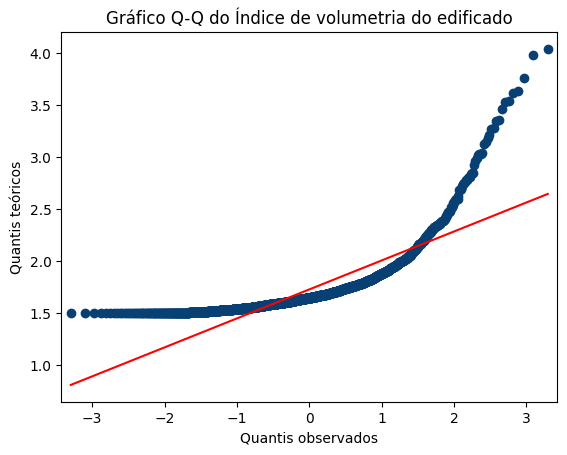

In [ ]:
# Gráfico Q-Q
sm.qqplot(df_BGRI_s["IVolumetria"], line='s', markerfacecolor='#094074', markeredgecolor='#094074')
plt.title("Gráfico Q-Q do Índice de volumetria do edificado")
plt.xlabel("Quantis observados")
plt.ylabel("Quantis teóricos")
plt.show()

A observação de desvios da linha de referência no diagrama Q-Q indica que os dados não seguem uma distribuição normal. A presença de pontos afastados dos dois lados sugere a presença de outliers.




**Histrograma do índice de volumetria do edificado**

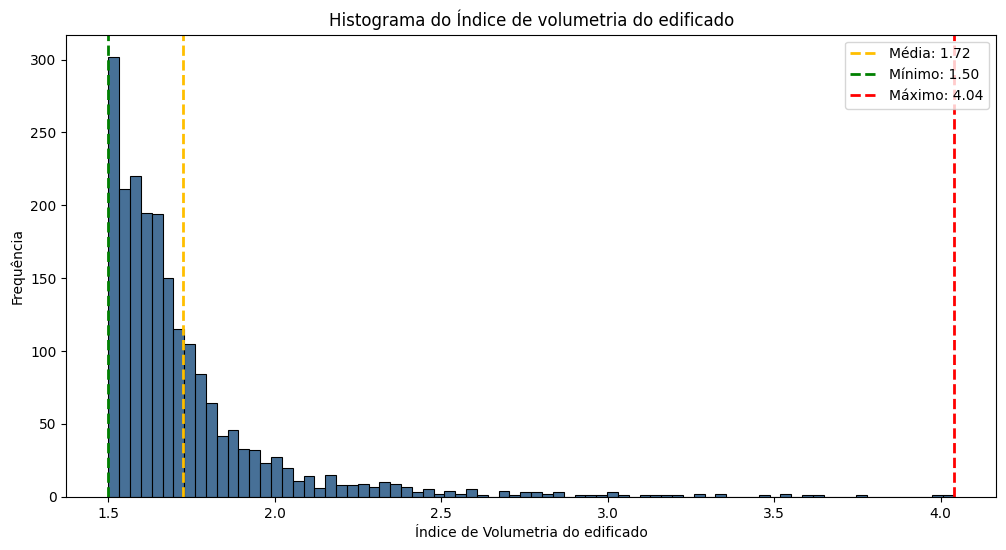

In [ ]:
# Histograma do Índice de volumetria do edificado
fig, axes = plt.subplots(figsize=(12, 6))
sns.histplot(df_BGRI_s["IVolumetria"], ax=axes, color="#094074")
axes.set_title("Histograma do Índice de volumetria do edificado")
axes.set_xlabel("Índice de Volumetria do edificado")
axes.set_ylabel('Frequência')

# Linha mean
mean_value = df_BGRI_s["IVolumetria"].mean()
axes.axvline(mean_value, color='#FFBF00', linestyle='dashed', linewidth=2, label=f'Média: {mean_value:.2f}')

# Linhas para mostrar o mínimo e o máximo
min_value = df_BGRI_s["IVolumetria"].min()
max_value = df_BGRI_s["IVolumetria"].max()
axes.axvline(min_value, color='green', linestyle='dashed', linewidth=2, label=f'Mínimo: {min_value:.2f}')
axes.axvline(max_value, color='red', linestyle='dashed', linewidth=2, label=f'Máximo: {max_value:.2f}')

# Legenda
axes.legend(loc='upper right', fontsize='medium', frameon=True)

plt.show()

A assimetria à direita no histograma indica uma distribuição enviesada positivamente. Isso significa que há uma concentração maior de valores acima da média. A presença clara de outliers sugere que existem valores extremos que podem afetar a normalidade dos dados.

**Boxplot da Índice de Volumetria do edificado**

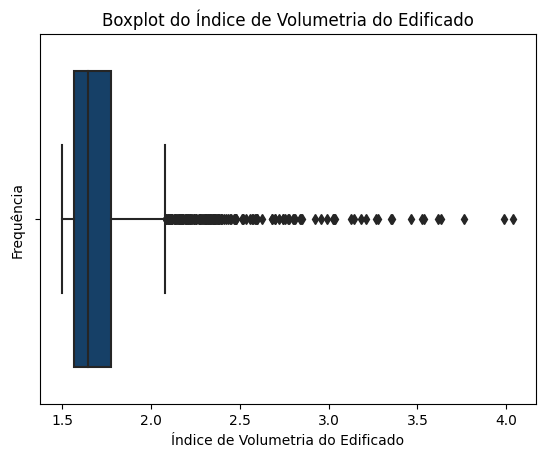

In [ ]:
# BOXPLOT DO ÍNDICE DE VOLUMETRIA
b_ivo = sns.boxplot(x=df_BGRI_s["IVolumetria"], color="#094074")

# Título
b_ivo.set_title('Boxplot do Índice de Volumetria do Edificado')

# Nome dos eixos
b_ivo.set_xlabel('Índice de Volumetria do Edificado')
b_ivo.set_ylabel('Frequência')

# Show the plot
plt.show()


O deslocamento da caixa principal para a direita em relação aos whiskers indica uma assimetria nos dados, também corroborando a observação de assimetria positiva no histograma. A grande presença de outliers reforça a ideia de que existem valores discrepantes em seus dados.

**Observações gerais dos gráficos**

Com base nessas análises, é evidente que o indicador não segue uma distribuição normal. A presença de assimetria à direita, a falta de aderência à linha de referência no diagrama Q-Q e a notável quantidade de outliers indicam que os dados têm uma natureza não normal. Em vista desses resultados, é necessario realizar um teste de normalidade a fim de avaliar formalmente a normalidade dos dados.

#### **Teste de normalidade**

**Teste de Shapiro-Wilk**

In [ ]:
data = df_BGRI_s['IVolumetria']

# Níveis de significância
alpha_1 = 0.05  # Nível de significância de 5%
alpha_2 = 0.01  # Nível de significância de 1%

# Teste de Shapiro-Wilk
statistic, p_value = stats.shapiro(data)

# Resultados
print("Estatística de teste:", statistic)
print("Valor p:", p_value)

print("")

# Teste a hipótese nula para alpha = 0.05
if p_value > alpha_1:
    print("Para alpha =", alpha_1)
    print("""Os dados parecem seguir uma distribuição normal (não rejeitamos a hipótese nula).
    """)
else:
    print("Para alpha =", alpha_1)
    print("""Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).
    """)

# Teste a hipótese nula para alpha = 0.01
if p_value > alpha_2:
    print("Para alpha =", alpha_2)
    print("Os dados parecem seguir uma distribuição normal (não rejeitamos a hipótese nula).")
else:
    print("Para alpha =", alpha_2)
    print("Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).")


Estatística de teste: 0.673598051071167
Valor p: 0.0

Para alpha = 0.05
Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).
    
Para alpha = 0.01
Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).


####**Observações**


Com base nas análises dos gráficos e no resultado do teste de normalidade, é evidente que o indicador do Índice de volumetria do edificado não segue uma distribuição normal.

Portanto, é fundamental reconhecer a não normalidade dos dados ao conduzir análises e interpretações subsequentes. Isso pode implicar o uso de métodos estatísticos não paramétricos para garantir análises sólidas que refletam a distribuição real dos dados.

### **Idade média do edificado**

#### **Gráficos**

**Diagrama da idade média do edificado**

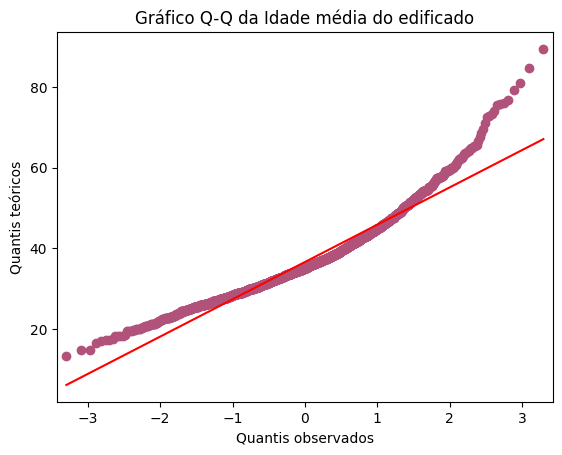

In [ ]:
# Gráfico Q-Q
sm.qqplot(df_BGRI_s["IMédia_edif"], line='s', markerfacecolor='#b0527a', markeredgecolor='#b0527a')
plt.title("Gráfico Q-Q da Idade média do edificado")
plt.xlabel("Quantis observados")
plt.ylabel("Quantis teóricos")
plt.show()

A observação de que a parte central dos pontos se aproxima da linha de referência sugere que os dados no centro seguem uma distribuição normal. No entanto, a presença de pontos afastados dos dois lados indica a presença de outliers nas extremidades da distribuição.

**Histograma da idade média do edificado**

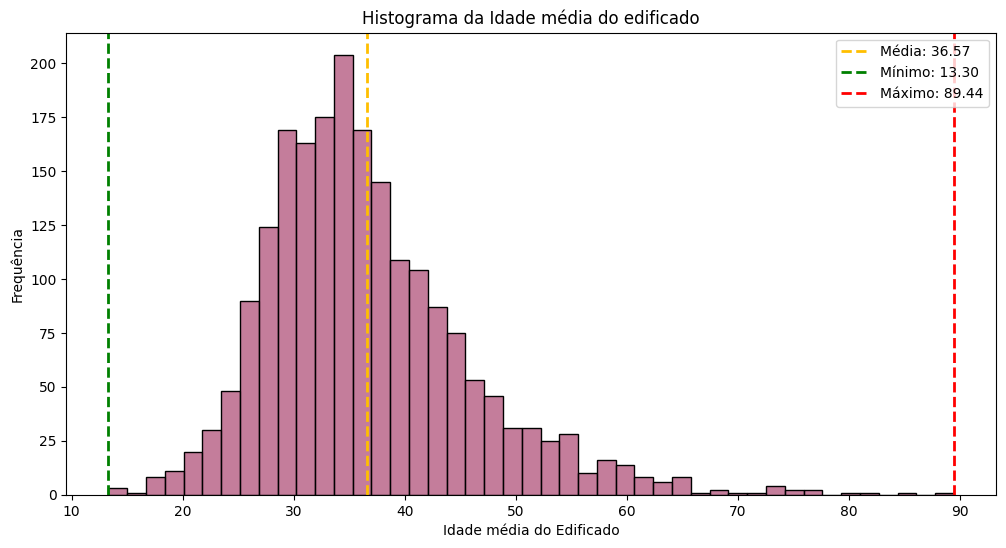

In [ ]:
# Histograma da idade média do edificado
fig, axes = plt.subplots(figsize=(12, 6))
sns.histplot(df_BGRI_s["IMédia_edif"], ax=axes, color="#b0527a")
axes.set_title("Histograma da Idade média do edificado")
axes.set_xlabel("Idade média do Edificado")
axes.set_ylabel('Frequência')

# Linha mean
mean_value = df_BGRI_s["IMédia_edif"].mean()
axes.axvline(mean_value, color='#FFBF00', linestyle='dashed', linewidth=2, label=f'Média: {mean_value:.2f}')

# Linhas para mostrar o mínimo e o máximo
min_value = df_BGRI_s["IMédia_edif"].min()
max_value = df_BGRI_s["IMédia_edif"].max()
axes.axvline(min_value, color='green', linestyle='dashed', linewidth=2, label=f'Mínimo: {min_value:.2f}')
axes.axvline(max_value, color='red', linestyle='dashed', linewidth=2, label=f'Máximo: {max_value:.2f}')

# Legenda
axes.legend(loc='upper right', fontsize='medium', frameon=True)

plt.show()

A assimetria à direita no histograma indica uma distribuição enviesada positivamente, o que significa que há uma concentração maior de valores acima da média. Além disso, a presença de alguns outliers indica a ocorrência de valores extremos nessa direção.

**Boxplot da idade média do edificado**

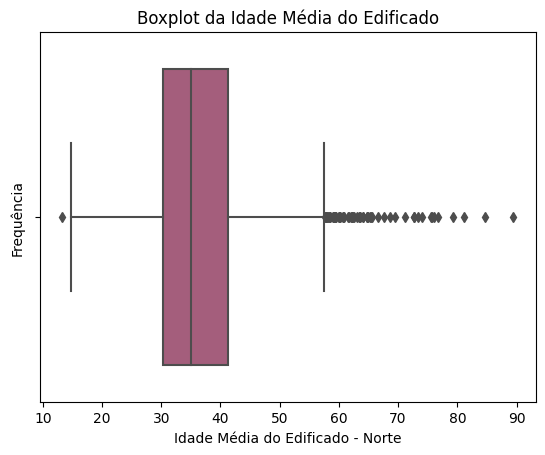

In [ ]:
# BOXPLOT DA IDADE MÉDIA DO EDIFICADO
b_ime = sns.boxplot(x=df_BGRI_s["IMédia_edif"], color="#b0527a")

# Título
b_ime.set_title('Boxplot da Idade Média do Edificado')

# Nome dos eixos
b_ime.set_xlabel('Idade Média do Edificado - Norte')  # Adjusted x-axis label for clarity
b_ime.set_ylabel('Frequência')

# Show the plot
plt.show()


O fato de a caixa principal estar centrada entre os whiskers sugere que a mediana dos dados está no centro da distribuição. No entanto, a presença de outliers à esquerda e à direita dos whiskers indica a existência de valores discrepantes tanto na extremidade inferior quanto na superior.

**Observações gerais dos gráficos**

Com base nessas análises, é evidente que o indicador não segue uma distribuição normal. A presença de assimetria à direita, a falta de aderência à linha de referência no diagrama Q-Q e a notável quantidade de outliers em ambas as extremidades dos dados indicam que os dados têm uma natureza não normal. Em vista desses resultados, é necessario realizar um teste de normalidade a fim de avaliar formalmente a normalidade dos dados.

#### **Teste de normalidade**

**Shapiro-Wilk**

In [ ]:
data = df_BGRI_s['IMédia_edif']

# Níveis de significância
alpha_1 = 0.05  # Nível de significância de 5%
alpha_2 = 0.01  # Nível de significância de 1%

# Teste de Shapiro-Wilk
statistic, p_value = stats.shapiro(data)

# Resultados
print("Estatística de teste:", statistic)
print("Valor p:", p_value)

print("")

# Teste a hipótese nula para alpha = 0.05
if p_value > alpha_1:
    print("Para alpha =", alpha_1)
    print("""Os dados parecem seguir uma distribuição normal (não rejeitamos a hipótese nula).
    """)
else:
    print("Para alpha =", alpha_1)
    print("""Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).
    """)

# Teste a hipótese nula para alpha = 0.01
if p_value > alpha_2:
    print("Para alpha =", alpha_2)
    print("Os dados parecem seguir uma distribuição normal (não rejeitamos a hipótese nula).")
else:
    print("Para alpha =", alpha_2)
    print("Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).")


Estatística de teste: 0.9419973492622375
Valor p: 1.7115128895976994e-27

Para alpha = 0.05
Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).
    
Para alpha = 0.01
Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).


#### **Obsercações**

Com base nas análises dos gráficos e no resultado do teste de normalidade, fica claro que o indicador da Idade Média do Edificado não segue uma distribuição normal.

Portanto, é fundamental reconhecer a não normalidade dos dados ao conduzir análises e interpretações subsequentes. Isso pode implicar o uso de métodos estatísticos não paramétricos para garantir análises sólidas que refletam a distribuição real dos dados.

### **Índice de qualificação**

####**Gráficos**

**Diagrama Q-Q do Índice de qualificação**

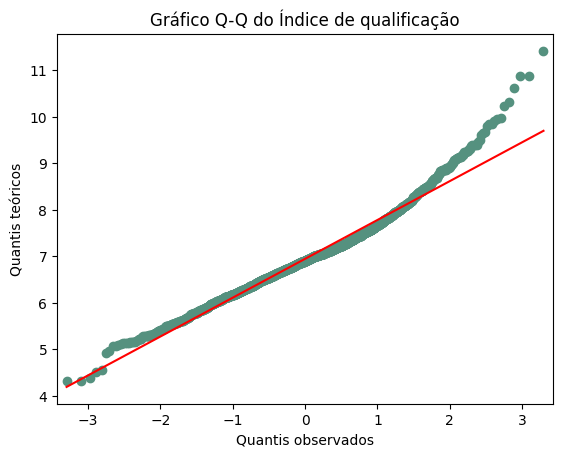

In [ ]:
# Gráfico Q-Q
sm.qqplot(df_BGRI_s["ind_qualificações"], line='s', markerfacecolor='#55917F', markeredgecolor='#55917F')
plt.title("Gráfico Q-Q do Índice de qualificação")
plt.xlabel("Quantis observados")
plt.ylabel("Quantis teóricos")
plt.show()

A parte central dos pontos se aproximar da linha de referência indica que os dados no centro se aproximam de uma distribuição normal. No entanto, a presença de pontos afastados dos dois lados sugere a existência de outliers nas extremidades da distribuição.

**Histograma do Índice de qualificação**

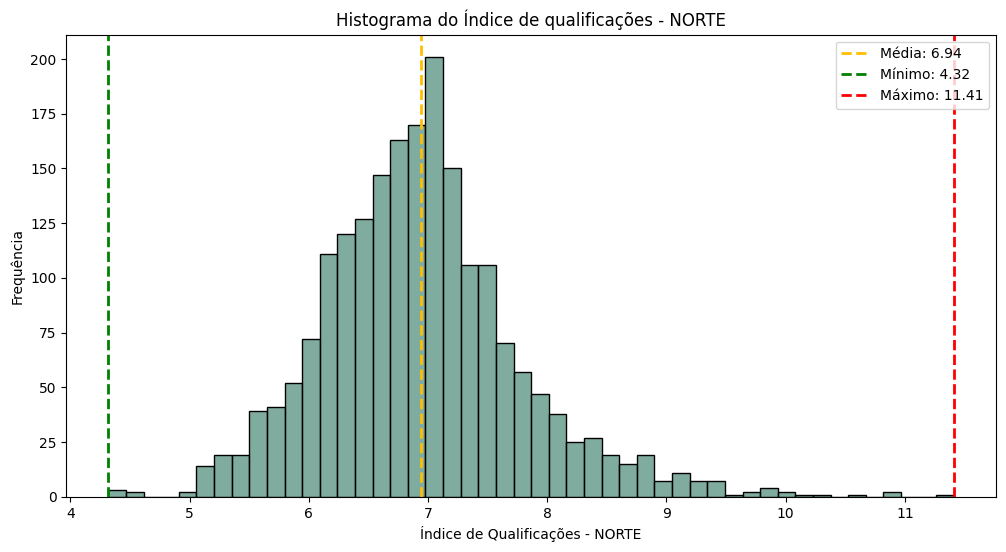

In [ ]:
# Histograma do Índice de qualificações
fig, axes = plt.subplots(figsize=(12, 6))
sns.histplot(df_BGRI_s["ind_qualificações"], ax=axes, color="#55917F")
axes.set_title("Histograma do Índice de qualificações - NORTE")
axes.set_xlabel("Índice de Qualificações - NORTE")  # Corrected x-axis label
axes.set_ylabel('Frequência')

# Linha mean para o histograma
mean_value = df_BGRI_s["ind_qualificações"].mean()
axes.axvline(mean_value, color='#FFBF00', linestyle='dashed', linewidth=2, label=f'Média: {mean_value:.2f}')

# Adicione linhas para mostrar o mínimo e o máximo
min_value = df_BGRI_s["ind_qualificações"].min()
max_value = df_BGRI_s["ind_qualificações"].max()
axes.axvline(min_value, color='green', linestyle='dashed', linewidth=2, label=f'Mínimo: {min_value:.2f}')
axes.axvline(max_value, color='red', linestyle='dashed', linewidth=2, label=f'Máximo: {max_value:.2f}')

# Crie uma legenda
axes.legend(loc='upper right', fontsize='medium', frameon=True)

plt.show()

A ligeira assimetria à direita no histograma indica uma tendência de concentração de valores acima da média. A presença de alguns outliers dos dois lados do histograma sugere a presença de valores extremos.

**Boxplot do índice de qualificações**

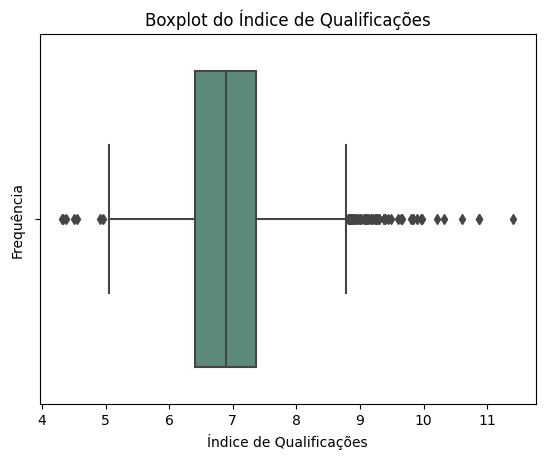

In [ ]:
# BOXplot do terceiro indicador (V3)
b_iq = sns.boxplot(x=df_BGRI_s['ind_qualificações'], color="#55917F")

# Título
b_iq.set_title("Boxplot do Índice de Qualificações")

# Nome dos eixos
b_iq.set_xlabel("Índice de Qualificações")
b_iq.set_ylabel("Frequência")

# Show the plot
plt.show()

A caixa principal parecendo centrada entre os whiskers sugere que a mediana dos dados está perto do centro da distribuição. No entanto, a observação de que os whiskers se encontram mais para a direita sugere uma assimetria. A presença relativamente grande de outliers tanto à esquerda quanto à direita indica valores discrepantes.

**Observações gerais dos gráficos**

Com base nessas análises, é evidente que o Índice de Qualificação não segue estritamente uma distribuição normal. A presença de assimetria, a falta de aderência total à distribuição normal no diagrama Q-Q e a presença de outliers em ambas as extremidades dos dados sugerem que os dados podem não ser normalmente distribuídos. Em vista desses resultados, é necessario realizar um teste de normalidade a fim de avaliar formalmente a normalidade dos dados.

---

####**Teste de normalidade**

**Teste de Shapiro-Wilk**

In [ ]:
data = df_BGRI_s['ind_qualificações']

# Definir os níveis de significância
alpha_1 = 0.05  # Nível de significância de 5%
alpha_2 = 0.01  # Nível de significância de 1%

# Teste de Shapiro-Wilk
statistic, p_value = stats.shapiro(data)

# Resultados
print("Estatística de teste:", statistic)
print("Valor p:", p_value)

print("")

# Teste a hipótese nula para alpha = 0.05
if p_value > alpha_1:
    print("Para alpha =", alpha_1)
    print("""Os dados parecem seguir uma distribuição normal (não rejeitamos a hipótese nula).
    """)
else:
    print("Para alpha =", alpha_1)
    print("""Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).
    """)

# Teste a hipótese nula para alpha = 0.01
if p_value > alpha_2:
    print("Para alpha =", alpha_2)
    print("Os dados parecem seguir uma distribuição normal (não rejeitamos a hipótese nula).")
else:
    print("Para alpha =", alpha_2)
    print("Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).")


Estatística de teste: 0.9736619591712952
Valor p: 7.395613510719834e-19

Para alpha = 0.05
Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).
    
Para alpha = 0.01
Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).


####**Observações**

Com base nas análises dos gráficos e no resultado do teste de normalidade, é evidente que o indicador do Índice de Qualificação não segue estritamente uma distribuição normal.

Portanto, é fundamental reconhecer a não normalidade dos dados ao conduzir análises e interpretações subsequentes. Isso pode implicar o uso de métodos estatísticos não paramétricos para garantir análises sólidas que refletam a distribuição real dos dados.

### **Índice de migração**

####**Gráficos**

**Diagrama Q-Q do índice de migração**

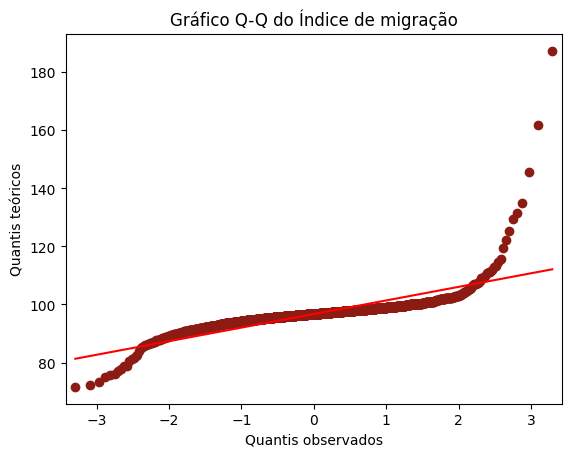

In [ ]:
# Gráfico Q-Q
sm.qqplot(df_BGRI_s["ind_migração"], line='s', markerfacecolor='#8c1c13', markeredgecolor='#8c1c13')
plt.title("Gráfico Q-Q do Índice de migração")
plt.xlabel("Quantis observados")
plt.ylabel("Quantis teóricos")
plt.show()

A parte central dos pontos se aproximar da linha de referência indica que os dados no centro tendem a se assemelhar a uma distribuição normal. No entanto, a presença de pontos bastante afastados dos dois lados sugere a existência de outliers extremos nas extremidades da distribuição.

**Histograma do índice de  migração**

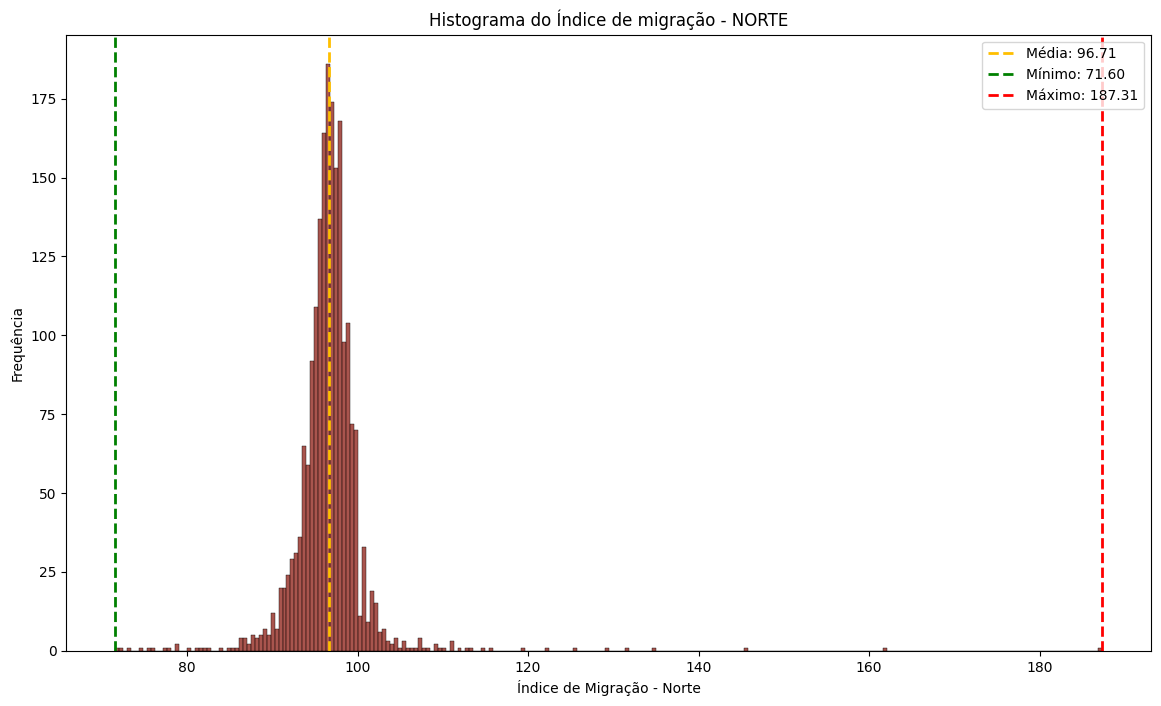

In [ ]:
# Histograma do Índice de migração
fig, axes = plt.subplots(figsize=(14, 8))
sns.histplot(df_BGRI_s["ind_migração"], ax=axes, color="#8c1c13")
axes.set_title("Histograma do Índice de migração - NORTE")
axes.set_xlabel("Índice de Migração - Norte")  # Adjusted x-axis label for clarity
axes.set_ylabel('Frequência')

# Linha mean
mean_value = df_BGRI_s["ind_migração"].mean()
axes.axvline(mean_value, color='#FFBF00', linestyle='dashed', linewidth=2, label=f'Média: {mean_value:.2f}')

# Linhas para mostrar o mínimo e o máximo
min_value = df_BGRI_s["ind_migração"].min()
max_value = df_BGRI_s["ind_migração"].max()
axes.axvline(min_value, color='green', linestyle='dashed', linewidth=2, label=f'Mínimo: {min_value:.2f}')
axes.axvline(max_value, color='red', linestyle='dashed', linewidth=2, label=f'Máximo: {max_value:.2f}')

# Legenda
axes.legend(loc='upper right', fontsize='medium', frameon=True)

plt.show()

 A assimetria à direita no histograma indica uma tendência de concentração de valores acima da média. A presença de outliers em ambos os lados, incluindo alguns que se estendem bastante longe, sugere a ocorrência de valores extremos.

**Boxplot do índice de migração**

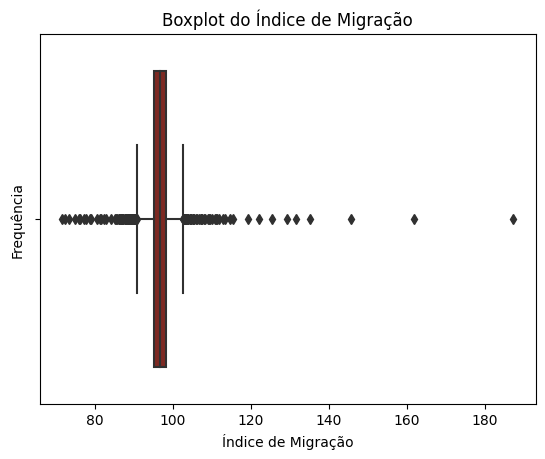

In [ ]:
# BOXplot do terceiro indicador
b_iq = sns.boxplot(x=df_BGRI_s['ind_migração'], color="#8c1c13")

# Título
b_iq.set_title("Boxplot do Índice de Migração")

# Nome dos eixos
b_iq.set_xlabel("Índice de Migração")
b_iq.set_ylabel("Frequência")

# Show the plot
plt.show()

 A observação de que a caixa principal parece estar centrada entre os whiskers sugere que a mediana dos dados está bem no centro da distribuição. No entanto, a presença de whiskers que se encontram à direita indica uma assimetria. A grande presença de outliers tanto à esquerda quanto à direita dos whiskers indica valores discrepantes.

**Observações gerais dos gráficos**

Com base nessas análises, parece que o Índice de Migração não segue estritamente uma distribuição normal. A presença de assimetria, a falta de aderência total à distribuição normal no diagrama Q-Q e a presença de outliers extremos em ambas as extremidades dos dados sugerem que os dados podem não ser normalmente distribuídos. Em vista desses resultados, é necessario realizar um teste de normalidade a fim de avaliar formalmente a normalidade dos dados.

####**Teste de normalidade**

 **Teste de Shapiro-Wilk**

In [ ]:
data = df_BGRI_s['ind_migração']

# Definir os níveis de significância
alpha_1 = 0.05  # Nível de significância de 5%
alpha_2 = 0.01  # Nível de significância de 1%

# Teste de Shapiro-Wilk
statistic, p_value = stats.shapiro(data)

# Resultados
print("Estatística de teste:", statistic)
print("Valor p:", p_value)

print("")

# Teste a hipótese nula para alpha = 0.05
if p_value > alpha_1:
    print("Para alpha =", alpha_1)
    print("""Os dados parecem seguir uma distribuição normal (não rejeitamos a hipótese nula).
    """)
else:
    print("Para alpha =", alpha_1)
    print("""Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).
    """)

# Teste a hipótese nula para alpha = 0.01
if p_value > alpha_2:
    print("Para alpha =", alpha_2)
    print("Os dados parecem seguir uma distribuição normal (não rejeitamos a hipótese nula).")
else:
    print("Para alpha =", alpha_2)
    print("Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).")

Estatística de teste: 0.6260035037994385
Valor p: 0.0

Para alpha = 0.05
Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).
    
Para alpha = 0.01
Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).


####**Observações**

Com base nas análises dos gráficos e no resultado do teste de normalidade, é evidente que o indicador do Índice de Migração não segue estritamente uma distribuição normal.

Portanto, é fundamental reconhecer a não normalidade dos dados ao conduzir análises e interpretações subsequentes. Isso pode implicar o uso de métodos estatísticos não paramétricos para garantir análises sólidas que refletam a distribuição real dos dados.

## **2. Indicador com 2 classes utlizando como linha de corte a mediana**

Neste exercício, propomos a criação de dois grupos com base no indicador de volumetria, utilizando a mediana como ponto de corte. O objetivo principal é analisar a presença de diferenças estatisticamente significativas entre esses dois grupos em relação aos demais indicadores. Para atingir este objetivo, formularemos hipóteses iniciais e apresentaremos os resultados por meio de box-plots, facilitando a visualização das diferenças entre os grupos.

Segundo Miranda (2008, p.123) um teste de hipóteses é um procedimento que nos leva a concluir em que circustancias é que os dados de uma amostra se mostram compatíveis com uma certa hipótese estatística. À hipótese inicialmente colocada, que se pretende testar,chama-se *hipótese inicial* ou *hipótese nula* e denota-se por *H0*. O conjunto de valores que se colocam em alternativa à hipótese inicial constitui a *hipótese alternativa* e se representa por *H1*.

**Índice de volumetria do edificado separado em dois grupos pela mediana**




[Text(0, 0, '1014'), Text(0, 0, '1014')]

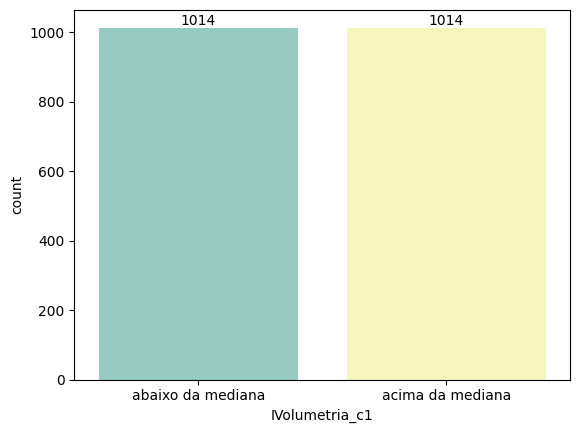

In [ ]:
# Calcular a mediana
median_vag = df_BGRI_s["IVolumetria"].median()

# Construção de categorias - 2 grupos
categorias = ["abaixo da mediana", "acima da mediana"]
intervals = [-1, median_vag, 9]
df_BGRI_s["IVolumetria_c1"] = pd.cut(df_BGRI_s.IVolumetria, intervals, labels=categorias)
df_BGRI_s[["IVolumetria", "IVolumetria_c1"]]

ax = sns.countplot(x=df_BGRI_s["IVolumetria_c1"], data=df_BGRI_s, palette='Set3')
ax.bar_label(ax.containers[0])

### **Idade média do edificado vs Índice de volumetria**

Hipótese Nula (H0): A hipótese nula parte do pressuposto de que não há diferença significativa entre os grupos A e B em relação à Idade Média do Edificado. Isso significa que, sob a premissa da H0, qualquer diferença observada entre os grupos é atribuível ao acaso ou a flutuações normais nos dados.

Hipótese Alternativa (H1): A hipótese alternativa, por outro lado, postula que há uma diferença significativa entre os grupos A e B em relação à Idade Média do Edificado. Isso implica que as diferenças observadas não podem ser explicadas apenas pelo acaso, mas sim indicam que algo está influenciando ou afetando a Idade Média do Edificado de maneira substancial nos grupos A e B.

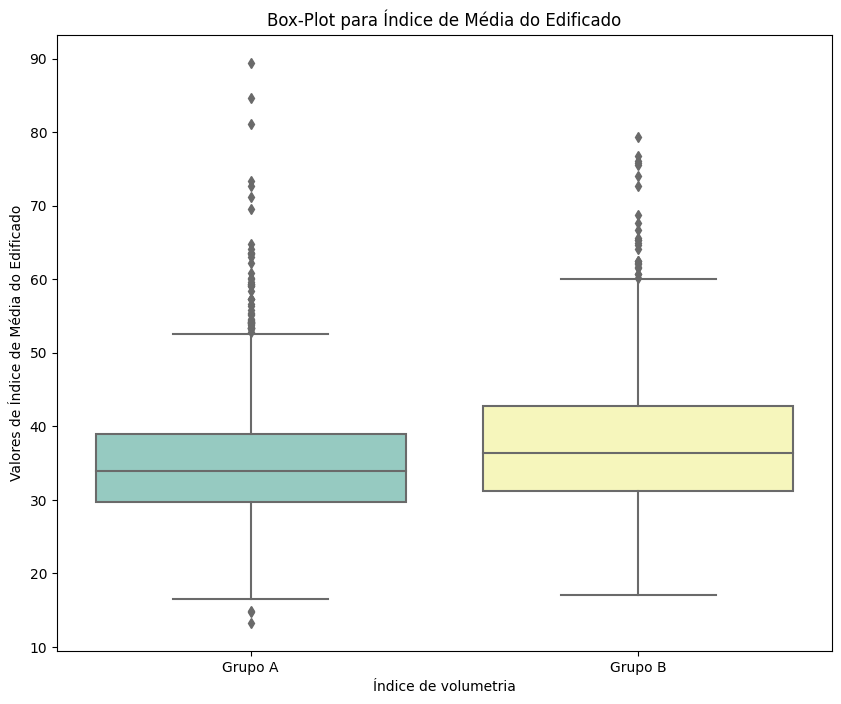

In [ ]:
# Calcular a mediana
median_vag = df_BGRI_s["IVolumetria"].median()

# Dividir os dados em dois grupos com base na mediana
grupo_A = df_BGRI_s[df_BGRI_s["IVolumetria"] > median_vag]
grupo_B = df_BGRI_s[df_BGRI_s["IVolumetria"] <= median_vag]

# Teste de Mann-Whitney
statistic, p_value = mannwhitneyu(grupo_A['IMédia_edif'], grupo_B['IMédia_edif'], alternative='two-sided')

# Max, min, média - Grupo A
max_value_A = grupo_A['IMédia_edif'].max()
min_value_A = grupo_A['IMédia_edif'].min()
mean_value_A = grupo_A['IMédia_edif'].mean()

# Max, min, média - Grupo B
max_value_B = grupo_B['IMédia_edif'].max()
min_value_B = grupo_B['IMédia_edif'].min()
mean_value_B = grupo_B['IMédia_edif'].mean()

# Box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='group', y='IMédia_edif', data=pd.concat([grupo_A.assign(group='Grupo A'), grupo_B.assign(group='Grupo B')], axis=0), palette='Set3')
plt.title('Box-Plot para Índice de Média do Edificado')
plt.xlabel('Índice de volumetria')
plt.ylabel('Valores de Índice de Média do Edificado')

# Teste a hipótese nula
alpha = 0.05  # Nível de significância
if p_value > alpha:
    result_text = "Não há diferença estatisticamente significativa entre os grupos (não rejeitamos a hipótese nula)."
else:
    result_text = "Há diferença estatisticamente significativa entre os grupos (rejeitamos a hipótese nula)."

# Resultado num quadro
style = '''
<div style="display: flex; justify-content: center; flex-direction: column; align-items: center;">
  <div style="border: 1px solid #000; padding: 15px; text-align: center;">
    <p>Teste de Mann-Whitney para Índice de Média do Edificado</p>
    <p>Estatística: {0}, Valor-p: {1}</p>
    <p>{2}</p>
    <p>Grupo A - Máximo: {3:.4f}, Mínimo: {4:.4f}, Média: {5:.4f}</p>
    <p>Grupo B - Máximo: {6:.4f}, Mínimo: {7:.4f}, Média: {8:.4f}</p>
  </div>
</div>
'''.format(statistic, p_value, result_text, max_value_A, min_value_A, mean_value_A, max_value_B, min_value_B, mean_value_B)

# Ver o conteúdo
display(HTML(style))


Neste caso, o valor-p é muito baixo (4.433032660355271e-59), indicando que é altamente improvável obter um resultado tão extremo se a hipótese nula for verdadeira. Portanto, **rejeitamos a hipótese nula** e aceitamos a hipótese alternativa, que sugere a existência de uma diferença significativa entre os dois grupos.

Em resumo, podemos afirmar que as médias do indicador 'Índice de qualificação' diferem nos dois grupos, com as médias do grupo A sendo superiores.

Esta conclusão está em consonância com os resultados dos gráficos de box-plot, que evidenciam que os valores do grupo A são maiores.

Portanto, a resposta apropriada é a aceitação da hipótese alternativa (H1).

---

### **Índice de qualificação vs Índice de volumetria**

Hipótese Nula (H0): A hipótese nula parte do pressuposto de que não há diferença significativa entre os grupos A e B em relação ao Índice de Qualificação. Isso significa que, sob a premissa da H0, qualquer diferença observada entre os grupos é atribuível ao acaso ou a flutuações normais nos dados, e não reflete uma diferença real no Índice de Qualificação entre os grupos.

Hipótese Alternativa (H1): A hipótese alternativa, por outro lado, postula que há uma diferença significativa entre os grupos A e B em relação ao Índice de Qualificação. Isso implica que as diferenças observadas não podem ser explicadas apenas pelo acaso, mas sim indicam que algo está influenciando ou afetando o Índice de Qualificação de maneira substancial nos grupos A e B.

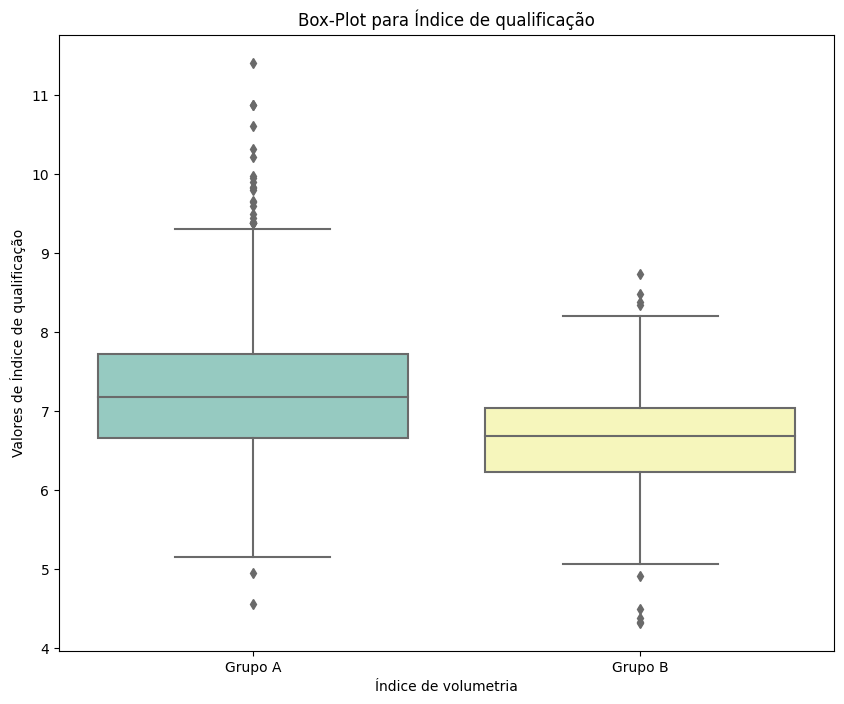

In [ ]:
# Teste de Mann-Whitney
statistic, p_value = mannwhitneyu(grupo_A["ind_qualificações"], grupo_B["ind_qualificações"], alternative='two-sided')

# Max, min, média - Grupo A
max_value_A = grupo_A["ind_qualificações"].max()
min_value_A = grupo_A["ind_qualificações"].min()
mean_value_A = grupo_A["ind_qualificações"].mean()

# Max, min, média - Grupo B
max_value_B = grupo_B["ind_qualificações"].max()
min_value_B = grupo_B["ind_qualificações"].min()
mean_value_B = grupo_B["ind_qualificações"].mean()

# Box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='group', y='ind_qualificações', data=pd.concat([grupo_A.assign(group='Grupo A'), grupo_B.assign(group='Grupo B')], axis=0), palette='Set3')
plt.title('Box-Plot para Índice de qualificação')
plt.xlabel('Índice de volumetria')
plt.ylabel('Valores de Índice de qualificação')

# Teste a hipótese nula
alpha = 0.05  # Nível de significância
if p_value > alpha:
    result_text = "Não há diferença estatisticamente significativa entre os grupos (não rejeitamos a hipótese nula)."
else:
    result_text = "Há diferença estatisticamente significativa entre os grupos (rejeitamos a hipótese nula)."

# Resultado num quadro
style = '''
<div style="display: flex; justify-content: center; flex-direction: column; align-items: center;">
  <div style="border: 1px solid #000; padding: 15px; text-align: center;">
    <p>Teste de Mann-Whitney para Índice de Qualificações</p>
    <p>Estatística: {0}, Valor-p: {1}</p>
    <p>{2}</p>
    <p>Grupo A - Máximo: {3:.4f}, Mínimo: {4:.4f}, Média: {5:.4f}</p>
    <p>Grupo B - Máximo: {6:.4f}, Mínimo: {7:.4f}, Média: {8:.4f}</p>
  </div>
</div>
'''.format(statistic, p_value, result_text, max_value_A, min_value_A, mean_value_A, max_value_B, min_value_B, mean_value_B)

# Ver o conteúdo
display(HTML(style))


Neste caso, o valor-p é muito baixo (4.433032660355271e-59), indicando que é altamente improvável obter um resultado tão extremo se a hipótese nula for verdadeira. Portanto, **rejeitamos a hipótese nula** e aceitamos a hipótese alternativa, que sugere a existência de uma diferença significativa entre os dois grupos.

Em resumo, podemos afirmar que as médias do indicador 'Índice de qualificação' diferem nos dois grupos, com as médias do grupo A sendo superiores.

Esta conclusão está em consonância com os resultados dos gráficos de box-plot, que evidenciam que os valores do grupo A são maiores.

Portanto, a resposta apropriada é a aceitação da hipótese alternativa (H1).


---

### **Índice de migração vs Índice de volumetria**

Hipótese Nula (H0): A hipótese nula parte do pressuposto de que não há diferença significativa entre os grupos A e B em relação ao Índice de migração. Isso significa que, sob a premissa da H0, qualquer diferença observada entre os grupos é atribuível ao acaso ou a flutuações normais nos dados, e não reflete uma diferença real no Índice de migração entre os grupos.

Hipótese Alternativa (H1): A hipótese alternativa, por outro lado, postula que há uma diferença significativa entre os grupos A e B em relação ao Índice de migração. Isso implica que as diferenças observadas não podem ser explicadas apenas pelo acaso, mas sim indicam que algo está influenciando ou afetando o Índice de migração de maneira substancial nos grupos A e B.

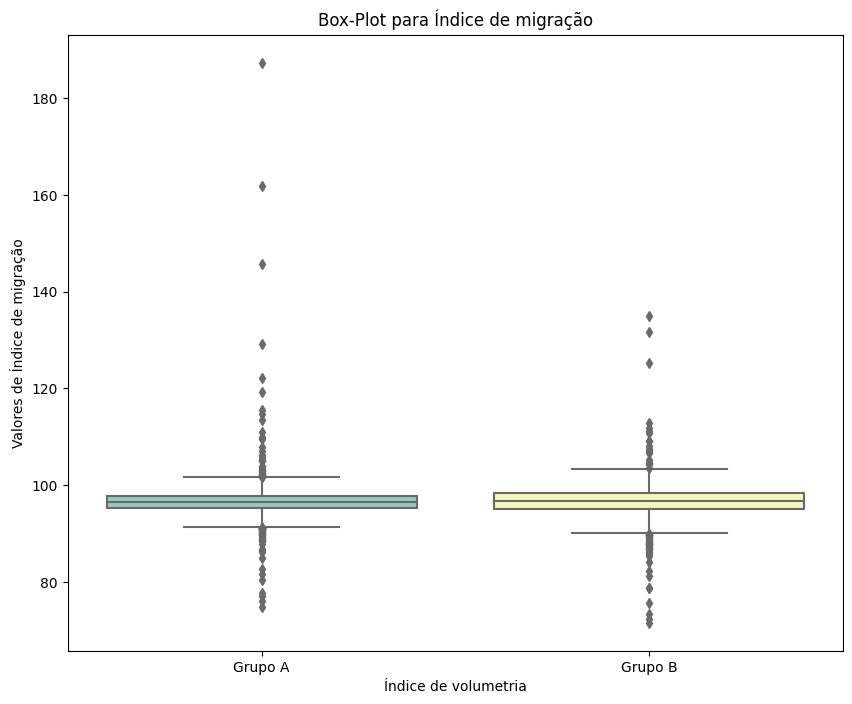

In [ ]:
# Teste de Mann-Whitney
statistic, p_value = mannwhitneyu(grupo_A["ind_migração"], grupo_B["ind_migração"], alternative='two-sided')

# Max, min, média - Grupo A
max_value_A = grupo_A["ind_migração"].max()
min_value_A = grupo_A["ind_migração"].min()
mean_value_A = grupo_A["ind_migração"].mean()

# Max, min, média - Grupo B
max_value_B = grupo_B["ind_migração"].max()
min_value_B = grupo_B["ind_migração"].min()
mean_value_B = grupo_B["ind_migração"].mean()

# Box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='group', y='ind_migração', data=pd.concat([grupo_A.assign(group='Grupo A'), grupo_B.assign(group='Grupo B')], axis=0), palette='Set3')
plt.title('Box-Plot para Índice de migração')
plt.xlabel('Índice de volumetria')
plt.ylabel('Valores de Índice de migração')

# Teste a hipótese nula
alpha = 0.05  # Nível de significância
if p_value > alpha:
    result_text = "Não há diferença estatisticamente significativa entre os grupos (não rejeitamos a hipótese nula)."
else:
    result_text = "Há diferença estatisticamente significativa entre os grupos (rejeitamos a hipótese nula)."

# Resultado num quadro
style = '''
<div style="display: flex; justify-content: center; flex-direction: column; align-items: center;">
  <div style="border: 1px solid #000; padding: 15px; text-align: center;">
    <p>Teste de Mann-Whitney para Índice de migração</p>
    <p>Estatística: {0}, Valor-p: {1}</p>
    <p>{2}</p>
    <p>Grupo A - Máximo: {3:.4f}, Mínimo: {4:.4f}, Média: {5:.4f}</p>
    <p>Grupo B - Máximo: {6:.4f}, Mínimo: {7:.4f}, Média: {8:.4f}</p>
  </div>
</div>
'''.format(statistic, p_value, result_text, max_value_A, min_value_A, mean_value_A, max_value_B, min_value_B, mean_value_B)

# Ver o conteúdo
display(HTML(style))


Neste caso, o valor-p é muito baixo (0.017535705399185055), indicando que é altamente improvável obter um resultado tão extremo se a hipótese nula for verdadeira. Portanto, **rejeitamos a hipótese nula** e aceitamos a hipótese alternativa, que sugere a existência de uma diferença significativa entre os dois grupos.

Em resumo, podemos afirmar que as médias do indicador 'Índice de qualificação' diferem nos dois grupos, com as médias do grupo A sendo bem superiores.

Esta conclusão está em consonância com os resultados dos gráficos de box-plot, que evidenciam que os valores do grupo A são maiores.

Portanto, a resposta apropriada é a aceitação da hipótese alternativa (H1).

---

## **3. Indicador com 4 classes**






Nesta etapa do trabalho, optamos por criar quatro grupos com base nos valores aproximados dos quartis (P25, P50, P75) do indicador de índice de migração. Em seguida, analisamos a presença de diferenças significativas entre esses quatro grupos e outros indicadores. Formulamos hipóteses iniciais e apresentamos os resultados por meio de box-plots.

Foi tomada a decisão nesta parte do trabalho de realisar o teste de Kruskal-Wallis, devido à natureza dos nossos indicadores, de facto como explicado no exercicio anterior, nenhum dos deles seguem uma distribuição normal.

Foi feita esta escolha pois o Teste de Kruskal-Wallis é usado para comparar três ou mais grupos independentes, para avaliar as variáveis quantitativas que não obedecem o parâmetro de normalidade ou também variáveis qualitativas originais.

**Índice de ´migração´ separado em quatro grupos pelos quartis**

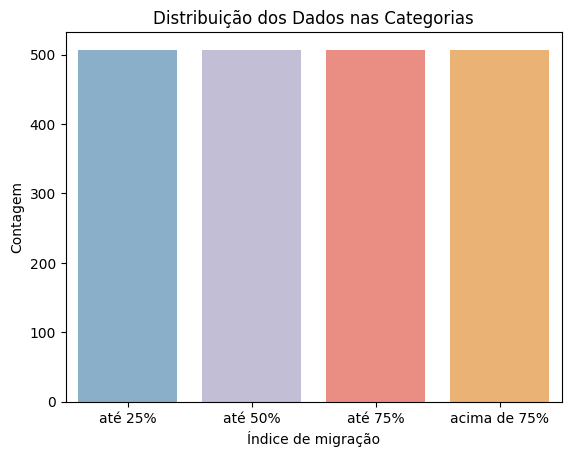

In [ ]:
# Definir o conjunto de cores 'Set3'
set3_colors = sns.color_palette("Set3")

# Calcular percentis 25, 50 e 75
perc_25_IMig = df_BGRI_s["ind_migração"].quantile(0.25)
perc_50_IMig = df_BGRI_s["ind_migração"].quantile(0.50)
perc_75_IMig = df_BGRI_s["ind_migração"].quantile(0.75)

# Definir as categorias e os intervalos
categorias = ["até 25%", "até 50%", "até 75%", "acima de 75%"]
intervals = [-1, perc_25_IMig, perc_50_IMig, perc_75_IMig, 999]
df_BGRI_s["ind_migração_c1"] = pd.cut(df_BGRI_s.ind_migração, bins=intervals, labels=categorias)

# Definir as cores personalizadas para as duas primeiras categorias
custom_colors = [set3_colors[4], set3_colors[2], set3_colors[3], set3_colors[5]]  # Escolha cores do conjunto 'Set3'

# Cores personalizadas no gráfico de barras
ax = sns.countplot(x=df_BGRI_s['ind_migração_c1'], data=df_BGRI_s, palette=custom_colors)
ax.set(xlabel='Índice de migração', ylabel='Contagem')
plt.title("Distribuição dos Dados nas Categorias")
plt.show()

### **Índice de volumetria vs Índice de migração**

**Teste de Kruskal-Wallis**

Hipótese Nula (H0): A hipótese nula pressupõe que não há diferença significativa entre os quatro grupos definidos pelas categorias do Índice de migração em relação ao Índice de volumetria. Isso significa que, sob a premissa da H0, qualquer variação no Índice de volumetria entre esses grupos pode ser atribuída ao acaso ou a flutuações normais nos dados, e não a diferenças reais relacionadas ao Índice de migração.

Hipótese Alternativa (H1): A hipótese alternativa, por sua vez, postula que existe uma diferença significativa entre os quatro grupos definidos pelas categorias do Índice de migração em relação ao Índice de volumetria. Isso sugere que as diferenças observadas não são resultado do acaso, mas sim indicam que o Índice de migração influencia de maneira significativa ao Índice de volumetria nos grupos "até 25%", "até 50%", "até 75%", e "acima de 75%".

Categoria,Máximo,Mínimo,Média
até 25%,3.5363,1.5000,1.6961
até 50%,3.7627,1.5000,1.7702
até 75%,2.6958,1.5000,1.7061
acima de 75%,4.0399,1.5000,1.7254


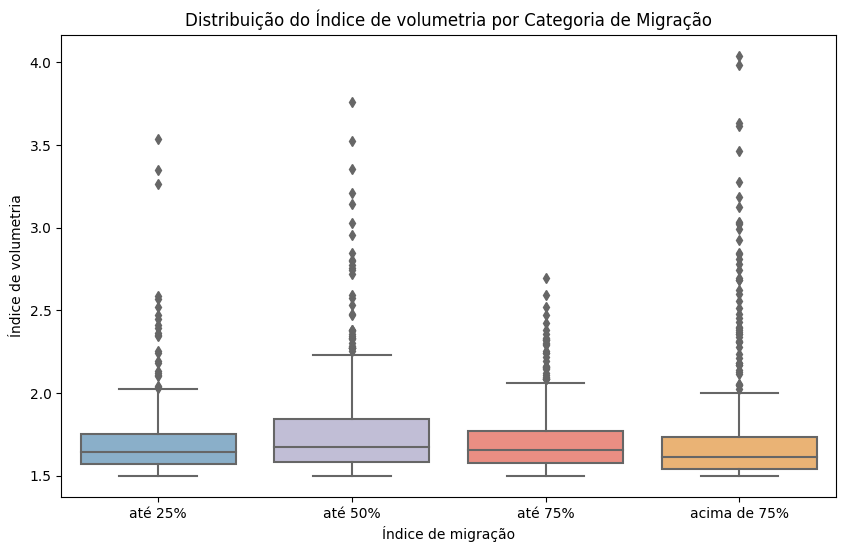

In [ ]:
# Teste de Kruskal-Wallis
kruskal_result = kruskal(*[df_BGRI_s[df_BGRI_s["ind_migração_c1"] == cat]["IVolumetria"] for cat in categorias])

# Máximo, mínimo e média para cada categoria
category_stats = {}
for cat in categorias:
    data_cat = df_BGRI_s[df_BGRI_s["ind_migração_c1"] == cat]["IVolumetria"]
    max_value = data_cat.max()
    min_value = data_cat.min()
    mean_value = data_cat.mean()
    category_stats[cat] = {'Máximo': max_value, 'Mínimo': min_value, 'Média': mean_value}

# Resultados num quadro
style = '''
<div style="display: flex; justify-content: center; flex-direction: column; align-items: center;">
  <div style="border: 1px solid #000; padding: 15px; text-align: center;">
    <p>Teste de Kruskal-Wallis para o Índice de volumetria </p>
    <p>Estatística do teste: {0}, Valor-p: {1}</p>
    <p>Resultados para cada categoria:</p>
    <table style="width:100%">
      <tr>
        <th>Categoria</th>
        <th>Máximo</th>
        <th>Mínimo</th>
        <th>Média</th>
      </tr>
      {2}
    </table>
  </div>
</div>
'''.format(kruskal_result.statistic, kruskal_result.pvalue, ''.join(['<tr><td>{}</td><td>{:.4f}</td><td>{:.4f}</td><td>{:.4f}</td></tr>'.format(cat, category_stats[cat]['Máximo'], category_stats[cat]['Mínimo'], category_stats[cat]['Média']) for cat in categorias]))

# Ver resultado
display(HTML(style))

# Box-plots
plt.figure(figsize=(10, 6))
sns.boxplot(x="ind_migração_c1", y="IVolumetria", data=df_BGRI_s, order=categorias, palette=custom_colors)
plt.xlabel("Índice de migração")
plt.ylabel("Índice de volumetria")
plt.title("Distribuição do Índice de volumetria por Categoria de Migração")
plt.show()

A estatística do teste é de 41.304759011030534. Esta estatística compara as variações entre as amostras. Quanto maior for o valor da estatística, mais forte é a evidência contra a hipótese nula. Neste caso 41.304759011030534 é uma estatística relativamente alta, o que significa que rejeita a hipótese nula.


O valor-p (5.63e-09) é significativamente menor que o nível de significância de 0.05. Portanto, rejeitamos a hipótese nula (H0).

Os resultados sugerem fortemente que há diferenças significativas entre as amostras. Em outras palavras, as distribuições de "IVolumetria" são diferentes entre as diferentes categorias de "ind_migração_c1". A rejeição da hipótese nula (assumindo que as amostras vêm da mesma distribuição) é apoiada pelos valores da estatística do teste e do valor-p.

Isso indica que há evidências estatísticas para concluir que pelo menos um dos grupos tem uma média significativamente diferente das outras categorias em relação ao índice de volumetria.

Para identificar quais grupos são diferentes entre si, pode ser interessante realizar um teste de comparação múltipla, como o teste de Dunn ou de Conover-Iman.


---

**Teste de Conover-Iman**

In [ ]:
# Teste de Conover-Iman
posthoc_result = posthoc_conover(df_BGRI_s, val_col='IVolumetria', group_col='ind_migração_c1')

# DataFrame a partir dos resultados
result_df = pd.DataFrame(posthoc_result)

# Ver DataFrame formatado
print("Resultados do Teste de Conover-Iman:")
table = tabulate(result_df, headers='keys', tablefmt='fancy_grid', numalign='center')
print(table)

Resultados do Teste de Conover-Iman:
╒══════════════╤═════════════╤═════════════╤════════════╤════════════════╕
│              │   até 25%   │   até 50%   │  até 75%   │  acima de 75%  │
╞══════════════╪═════════════╪═════════════╪════════════╪════════════════╡
│ até 25%      │      1      │ 0.000277677 │  0.16708   │   0.00719001   │
├──────────────┼─────────────┼─────────────┼────────────┼────────────────┤
│ até 50%      │ 0.000277677 │      1      │ 0.0239562  │  2.96661e-10   │
├──────────────┼─────────────┼─────────────┼────────────┼────────────────┤
│ até 75%      │   0.16708   │  0.0239562  │     1      │   4.8243e-05   │
├──────────────┼─────────────┼─────────────┼────────────┼────────────────┤
│ acima de 75% │ 0.00719001  │ 2.96661e-10 │ 4.8243e-05 │       1        │
╘══════════════╧═════════════╧═════════════╧════════════╧════════════════╛


Cada célula da matriz contém um valor-p associado à comparação entre duas categorias.

Valores-p pequenos (geralmente abaixo do nível de significância, como 0.05) indicam diferenças significativas nas IVolumetrias entre as categorias comparadas.

Valores-p maiores (geralmente acima do nível de significância) indicam que não há diferenças significativas nas IVolumetrias entre as categorias comparadas.

Por exemplo, na célula "até 25%" e "até 50%", o valor-p é muito pequeno (0.000278), indicando diferenças significativas entre essas duas categorias.

As categorias "até 25%" e "acima de 75%" estão frequentemente envolvidas em diferenças significativas com outras categorias. As comparações com "até 75%" tendem a não mostrar diferenças significativas em relação a outras categorias.



---

**Conclusão:**

Com base nos resultados do teste Kruskal-Wallis e da matriz de pares do teste de Conover-Iman, podemos concluir que há diferenças significativas nas médias do indicador de volumetria (IVolumetria) entre os grupos definidos pelas categorias de migração. Isso confirma a **rejeição da hipótese nula** no teste Kruskal-Wallis. As diferenças significativas entre os grupos são suportadas pelos baixos valores-p na matriz de pares do teste de Conover-Iman.

Portanto, a migração tem um impacto estatisticamente significativo nas médias de IVolumetria entre os grupos.


---

### **Idade média do edificado vs Índice de migração**

**Teste de Kruskal-Wallis**

Hipótese Nula (H0): A hipótese nula pressupõe que não há diferença significativa entre os quatro grupos definidos pelas categorias do Índice de migração em relação à Idade Média do Edificado. Isso significa que, sob a premissa da H0, qualquer variação na Idade Média do Edificado entre esses grupos pode ser atribuída ao acaso ou a flutuações normais nos dados, e não a diferenças reais relacionadas ao Índice de migração.

Hipótese Alternativa (H1): A hipótese alternativa, por sua vez, postula que existe uma diferença significativa entre os quatro grupos definidos pelas categorias do Índice de migração em relação à Idade Média do Edificado. Isso sugere que as diferenças observadas não são resultado do acaso, mas sim indicam que o Índice de migração influencia de maneira significativa a Idade Média do Edificado nos grupos "até 25%", "até 50%", "até 75%", e "acima de 75%".

Categoria,Máximo,Mínimo,Média
até 25%,76.7124,14.8525,36.8013
até 50%,76.1282,13.3038,35.1398
até 75%,75.7812,19.8193,35.7837
acima de 75%,89.4379,17.0450,38.5454


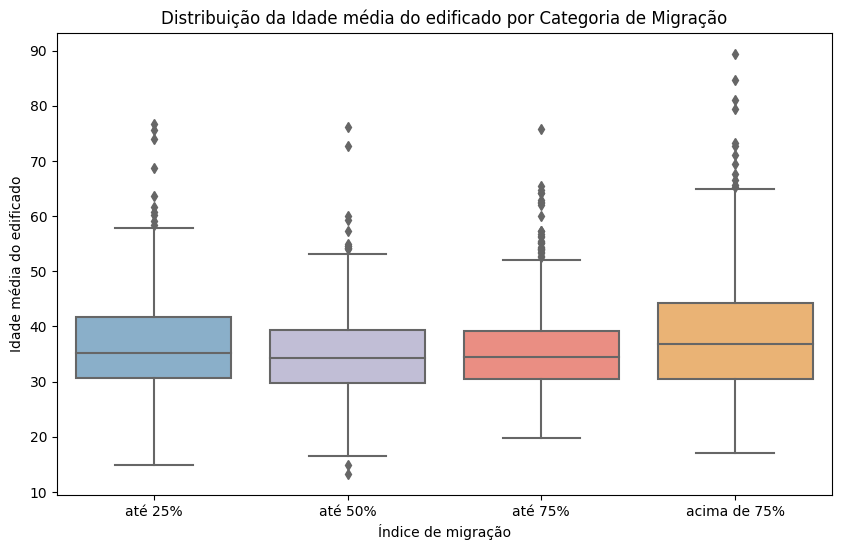

In [ ]:
# Teste de Kruskal-Wallis
kruskal_result = kruskal(*[df_BGRI_s[df_BGRI_s["ind_migração_c1"] == cat]["IMédia_edif"] for cat in categorias])

# Máximo, mínimo e média para cada categoria
category_stats = {}
for cat in categorias:
    data_cat = df_BGRI_s[df_BGRI_s["ind_migração_c1"] == cat]["IMédia_edif"]
    max_value = data_cat.max()
    min_value = data_cat.min()
    mean_value = data_cat.mean()
    category_stats[cat] = {'Máximo': max_value, 'Mínimo': min_value, 'Média': mean_value}

# Resultados dentro de um quadro
style = '''
<div style="display: flex; justify-content: center; flex-direction: column; align-items: center;">
  <div style="border: 1px solid #000; padding: 15px; text-align: center;">
    <p>Teste de Kruskal-Wallis para a Idade média do edificado</p>
    <p>Estatística do teste: {0}, Valor-p: {1}</p>
    <p>Resultados para cada categoria:</p>
    <table style="width:100%">
      <tr>
        <th>Categoria</th>
        <th>Máximo</th>
        <th>Mínimo</th>
        <th>Média</th>
      </tr>
      {2}
    </table>
  </div>
</div>
'''.format(kruskal_result.statistic, kruskal_result.pvalue, ''.join(['<tr><td>{}</td><td>{:.4f}</td><td>{:.4f}</td><td>{:.4f}</td></tr>'.format(cat, category_stats[cat]['Máximo'], category_stats[cat]['Mínimo'], category_stats[cat]['Média']) for cat in categorias]))

# Ver resultados
display(HTML(style))

# Box-plots
plt.figure(figsize=(10, 6))
sns.boxplot(x="ind_migração_c1", y="IMédia_edif", data=df_BGRI_s, order=categorias, palette=custom_colors)
plt.title("Distribuição da Idade média do edificado por Categoria de Migração")
plt.xlabel("Índice de migração")
plt.ylabel("Idade média do edificado")
plt.show()


A estatística do teste de Kruskal-Wallis é de 26.09767191359606. O valor da estatística é substancialmente alto, o que sugere a rejeição da hipótese nula.

O valor-p associado a este teste é de 9.09869359887949e-06, o que é significativamente inferior ao nível de significância de 0.05. Portanto, a hipótese nula (H0) é rejeitada.

Os resultados indicam fortemente a presença de diferenças significativas entre as amostras. Em outras palavras, as distribuições de "IMédia_edif" são distintas entre as diferentes categorias de "ind_migração_c1." A rejeição da hipótese nula (assumindo que as amostras vêm da mesma distribuição) é apoiada pelos valores da estatística do teste e do valor-p.

Isso sugere que há evidências estatísticas para concluir que pelo menos um dos grupos possui uma média significativamente diferente das outras categorias em relação a "IMédia_edif."

Vamos então realizar o teste de Conover-Iman para confirmar as nossas dúvidas.

---

**Teste de Conover-Iman**

In [ ]:
# Teste de Conover-Iman
posthoc_result = posthoc_conover(df_BGRI_s, val_col='IMédia_edif', group_col='ind_migração_c1')

# DataFrame a partir dos resultados
result_df = pd.DataFrame(posthoc_result)

# Exibir os resultados do Teste de Conover-Iman
print("Resultados do Teste de Conover-Iman:")
table = tabulate(result_df, headers='keys', tablefmt='fancy_grid', numalign='center')
print(table)

Resultados do Teste de Conover-Iman:
╒══════════════╤════════════╤═════════════╤═════════════╤════════════════╕
│              │  até 25%   │   até 50%   │   até 75%   │  acima de 75%  │
╞══════════════╪════════════╪═════════════╪═════════════╪════════════════╡
│ até 25%      │     1      │ 0.00530147  │  0.0394257  │   0.0646859    │
├──────────────┼────────────┼─────────────┼─────────────┼────────────────┤
│ até 50%      │ 0.00530147 │      1      │  0.465417   │  3.71467e-06   │
├──────────────┼────────────┼─────────────┼─────────────┼────────────────┤
│ até 75%      │ 0.0394257  │  0.465417   │      1      │  9.55396e-05   │
├──────────────┼────────────┼─────────────┼─────────────┼────────────────┤
│ acima de 75% │ 0.0646859  │ 3.71467e-06 │ 9.55396e-05 │       1        │
╘══════════════╧════════════╧═════════════╧═════════════╧════════════════╛


Como explicado anterioremente, cada célula na matriz de pares do teste de Conover-Iman contém um valor-p associado à comparação entre duas categorias.

Valores-p baixos (geralmente < 0.05) indicam diferenças significativas enquanto os mais elevados sugerem a ausência de diferenças significativas.

Neste caso, podemos ver por exemplo que nas células que comparam "até 25%" e "acima de 75%", o valor-p é muito baixo (3.71467e-06), indicando diferenças significativas entre essas duas categorias.

A categoria "acima de 75%" esta frequentemente envolvida em diferenças significativas com outras categorias. As comparações com as outras 3 categorias tendem a não mostrar diferenças significativas.

---

**Conclusão**

Com base nos resultados do teste de Kruskal-Wallis e nas análises da matriz de pares do teste de Conover-Iman para "IMédia_edif," podemos concluir que existem diferenças significativas nas médias desse indicador entre os grupos definidos pelas categorias de migração. A **rejeição da hipótese nula** no teste de Kruskal-Wallis é respaldada pelos valores-p na matriz de pares do teste de Conover-Iman.

---

### **Índice de qualificação vs Índice de migração**

**Teste de Kruskal-Wallis**

Hipótese Nula (H0): A hipótese nula pressupõe que não há diferença significativa entre os quatro grupos definidos pelas categorias do Índice de migração em relação ao Índice de qualificação. Isso significa que, sob a premissa da H0, qualquer variação no Índice de qualificação entre esses grupos pode ser atribuída ao acaso ou a flutuações normais nos dados, e não a diferenças reais relacionadas ao Índice de migração.

Hipótese Alternativa (H1): A hipótese alternativa, por sua vez, postula que existe uma diferença significativa entre os quatro grupos definidos pelas categorias do Índice de migração em relação ao Índice de qualificação. Isso sugere que as diferenças observadas não são resultado do acaso, mas sim indicam que o Índice de migração influencia de maneira significativa ao Índice de qualificação nos grupos "até 25%", "até 50%", "até 75%", e "acima de 75%".

Categoria,Máximo,Mínimo,Média
até 25%,11.4107,4.9130,6.8439
até 50%,10.6091,5.3393,7.1875
até 75%,9.3876,4.3269,6.9854
acima de 75%,10.8695,4.3200,6.7491


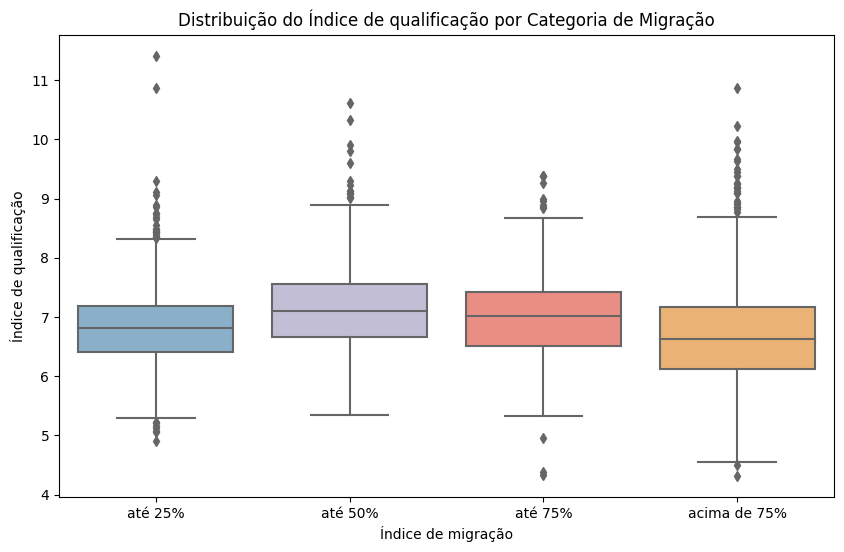

In [ ]:
# Teste de Kruskal-Wallis
kruskal_result = kruskal(*[df_BGRI_s[df_BGRI_s["ind_migração_c1"] == cat]["ind_qualificações"] for cat in categorias])

# Máximo, mínimo e média para cada categoria
category_stats = {}
for cat in categorias:
    data_cat = df_BGRI_s[df_BGRI_s["ind_migração_c1"] == cat]["ind_qualificações"]
    max_value = data_cat.max()
    min_value = data_cat.min()
    mean_value = data_cat.mean()
    category_stats[cat] = {'Máximo': max_value, 'Mínimo': min_value, 'Média': mean_value}

# Resultados dentro do quadro
style = '''
<div style="display: flex; justify-content: center; flex-direction: column; align-items: center;">
  <div style="border: 1px solid #000; padding: 15px; text-align: center;">
    <p>Teste de Kruskal-Wallis para o Índice de qualificação</p>
    <p>Estatística do teste: {0}, Valor-p: {1}</p>
    <p>Resultados para cada categoria:</p>
    <table style="width:100%">
      <tr>
        <th>Categoria</th>
        <th>Máximo</th>
        <th>Mínimo</th>
        <th>Média</th>
      </tr>
      {2}
    </table>
  </div>
</div>
'''.format(kruskal_result.statistic, kruskal_result.pvalue, ''.join(['<tr><td>{}</td><td>{:.4f}</td><td>{:.4f}</td><td>{:.4f}</td></tr>'.format(cat, category_stats[cat]['Máximo'], category_stats[cat]['Mínimo'], category_stats[cat]['Média']) for cat in categorias]))

# Mostrar resultados
display(HTML(style))

# Box-plots
plt.figure(figsize=(10, 6))
sns.boxplot(x="ind_migração_c1", y="ind_qualificações", data=df_BGRI_s, order=categorias, palette=custom_colors)
plt.title("Distribuição do Índice de qualificação por Categoria de Migração")
plt.xlabel("Índice de migração")
plt.ylabel("Índice de qualificação")
plt.show()


A estatística do teste de Kruskal-Wallis é de 107.48462654211114. O valor da estatística é substancialmente alto, o que sugere a rejeição da hipótese nula.

O valor-p associado a este teste é de 3.816003223869005e-23, o que é significativamente inferior ao nível de significância de 0.05. Portanto, a hipótese nula (H0) é rejeitada.

Os resultados indicam fortemente a presença de diferenças significativas entre as amostras. Em outras palavras, as distribuições de "ind_qualificações" são distintas entre as diferentes categorias de "ind_migração_c1." A rejeição da hipótese nula (que assume que as amostras vêm da mesma distribuição) é respaldada pelos valores da estatística do teste e do valor-p.

Isso sugere que há evidências estatísticas para concluir que pelo menos um dos grupos possui uma média significativamente diferente das outras categorias em relação a "ind_qualificações."

Para identificar quais grupos são diferentes entre si vamos realisar o teste de Conover-Iman.

---

**Teste de Conover-Iman**

In [ ]:
# Teste de Conover-Iman
posthoc_result = posthoc_conover(df_BGRI_s, val_col='ind_qualificações', group_col='ind_migração_c1')

# DataFrame a partir dos resultados
result_df = pd.DataFrame(posthoc_result)

# Exibir os resultados do Teste de Conover-Iman
print("Resultados do Teste de Conover-Iman para ind_qualificações:")
table = tabulate(result_df, headers='keys', tablefmt='fancy_grid', numalign='center')
print(table)

Resultados do Teste de Conover-Iman para ind_qualificações:
╒══════════════╤═════════════╤═════════════╤═════════════╤════════════════╕
│              │   até 25%   │   até 50%   │   até 75%   │  acima de 75%  │
╞══════════════╪═════════════╪═════════════╪═════════════╪════════════════╡
│ até 25%      │      1      │ 2.8793e-12  │ 0.000108118 │   0.00394829   │
├──────────────┼─────────────┼─────────────┼─────────────┼────────────────┤
│ até 50%      │ 2.8793e-12  │      1      │ 0.00167141  │  1.19717e-22   │
├──────────────┼─────────────┼─────────────┼─────────────┼────────────────┤
│ até 75%      │ 0.000108118 │ 0.00167141  │      1      │  1.74097e-11   │
├──────────────┼─────────────┼─────────────┼─────────────┼────────────────┤
│ acima de 75% │ 0.00394829  │ 1.19717e-22 │ 1.74097e-11 │       1        │
╘══════════════╧═════════════╧═════════════╧═════════════╧════════════════╛


Como explicado anterioremente, cada célula na matriz de pares do teste de Conover-Iman contém um valor-p associado à comparação entre duas categorias.

Valores-p baixos (geralmente < 0.05) indicam diferenças significativas enquanto os mais elevados sugerem a ausência de diferenças significativas.

Neste caso, podemos ver por exemplo que nas células que comparam "até 50%" e "acima de 75%", o valor-p é muito baixo (1.197169e-22), indicando diferenças significativas entre essas duas categorias.

As categorias "até 50%" e "acima de 75%" estão frequentemente envolvidaa em diferenças significativas com outras categorias. Ao contrario, nas comparações, as outras 2 categorias tendem a não mostrar diferenças significativas.

---

**Conclusão**

Com base nos resultados do teste de Kruskal-Wallis e nas análises da matriz de pares do teste de Conover-Iman para "IMédia_edif," podemos concluir que existem diferenças significativas nas médias desse indicador entre os grupos definidos pelas categorias de migração. A **rejeição da hipótese nula** no teste de Kruskal-Wallis é respaldada pelos valores-p na matriz de pares do teste de Conover-Iman.

### **Comparação exercicio 2 e 3**


No Exercício 2, foi realizado  o teste de Mann-Whitney para comparar duas amostras independentes, a fim de avaliar se havia diferenças significativas entre essas amostras em relação a um indicador específico. O resultado dos testes de Mann-Whitney indicou uma rejeição da hipótese nula para todos os indicadores, o que significa que há evidências estatísticas de que as duas amostras têm médias significativamente diferentes. Em outras palavras, os grupos que comparados no Exercício 2 demonstraram diferenças estatisticamente significativas no indicador do Índice de volumetria do edificado.

No Exercício 3, expandiu-se a análise para avaliar as diferenças em quatro grupos definidos pelas categorias do índice de migração em relação a três outros indicadores. Utilizou-se o teste de Kruskal-Wallis para verificar se havia diferenças significativas nas médias desses indicadores entre os grupos. Os resultados do teste de Kruskal-Wallis mostraram uma rejeição da hipótese nula para todos os indicadores, indicando que há evidências estatísticas de que pelo menos um dos grupos tem uma média significativamente diferente das outras categorias.

Em seguida, foi realizado o teste de Conover-Iman para identificar quais grupos específicos eram diferentes entre si. Os resultados desse teste mostraram que, de fato, as categorias do índice de migração apresentam diferenças significativas nas médias dos quatro indicadores, como "IVolumetria," "IMédia_edif," e "ind_qualificações."

Conclusão:

Em ambos os exercícios, os resultados dos testes estatísticos indicaram uma rejeição consistente da hipótese nula. Isso sugere que há diferenças significativas nas médias dos indicadores analisados em relação às categorias ou grupos de interesse.








## **4. Diferenças entre os indicadores categórios**

Nesta parte do trabalho, efetuamos uma análise comparativa entre os indicadores categóricos definidos nas questões 2 e 3. Utilizamos o teste Qui-Quadrado para investigar a existência de diferenças significativas entre esses indicadores categóricos.


### **Teste Qui-Quadrado**

O teste Qui-Quadrado é uma ferramenta estatística que nos permite avaliar a associação entre variáveis categóricas, identificando se as diferenças observadas são estatisticamente significativas. De acordo com **Miranda (1998, p.145)** o teste Qui-quadrado é um teste de ajustamento e que é aplicável tanto no caso de distribuições paramétricas como em distribuições não paramétricas e pode ser aplicado tanto para distribuições discretas como contínuas.

Os resultados desta análise fornecerão insights valiosos sobre a relação entre as variáveis em questão e auxiliarão na compreensão da existência de uma dependência estatisticamente significativa entre elas.

**Como interpretar os resultados:**

  -   **Tabela de Contingência**: Mostra como as categorias estão distribuídas conjuntamente.

  -   **Estatística Qui-Quadrado**: Mede o desvio entre frequências observadas e esperadas.

  -   **P-Valor**: Indica a probabilidade associada à estatística do teste.

  -   **Graus de Liberdade**: Representa categorias independentes - 1.

  -   **Tabela de Valores Esperados**: Exibe as contagens esperadas se as variáveis fossem independentes

Se o valor-p for menor que o nível de significância escolhido (por exemplo, 0.05),  terá evidências para rejeitar a hipótese nula. Isso indicaria que há uma associação significativa entre "ind_migração_c1" e "IVolumetria_c1".

Se o valor-p for maior que o nível de significância, não há evidências suficientes para rejeitar a hipótese nula, sugerindo que as variáveis são independentes.


In [ ]:
# Criação da tabela de contingência
contingency_table = pd.crosstab(df_BGRI_s['IVolumetria_c1'], df_BGRI_s['ind_migração_c1'])

# Teste Qui-Quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Tabela de contingência
headers = ["IVolumetria \\ Ind Migração"] + list(contingency_table.columns)
contingency_table_str = tabulate(contingency_table, headers, tablefmt="fancy_grid", numalign="center", colalign=("center",))
print("Tabela de Contingência:")
print(contingency_table_str)

# Valores Esperados
expected_table = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
expected_table_str = tabulate(expected_table, headers, tablefmt="fancy_grid", numalign="center", colalign=("center",))
print("\nValores Esperados:")
print(expected_table_str)

# Resultados do teste Qui-Quadrado
results_data = [
    ["Estatística Qui-Quadrado", chi2],
    ["Valor-p", p],
    ["Graus de Liberdade", dof]
]
results_headers = ["Medida de Associação", "Valor"]
results_table_str = tabulate(results_data, results_headers, tablefmt="fancy_grid", numalign="center", colalign=("center",))
print("\nResultados do Teste Qui-Quadrado:")
print(results_table_str)


# Verificar se a associação é significativa
alpha = 0.05  # Nível de significância
if p < alpha:
    print("\nHá uma associação significativa entre as variáveis.")
else:
    print("\nNão há uma associação significativa entre as variáveis.")

Tabela de Contingência:
╒══════════════════════════════╤═══════════╤═══════════╤═══════════╤════════════════╕
│  IVolumetria \ Ind Migração  │  até 25%  │  até 50%  │  até 75%  │  acima de 75%  │
╞══════════════════════════════╪═══════════╪═══════════╪═══════════╪════════════════╡
│      abaixo da mediana       │    261    │    223    │    231    │      299       │
├──────────────────────────────┼───────────┼───────────┼───────────┼────────────────┤
│       acima da mediana       │    246    │    284    │    276    │      208       │
╘══════════════════════════════╧═══════════╧═══════════╧═══════════╧════════════════╛

Valores Esperados:
╒══════════════════════════════╤═══════════╤═══════════╤═══════════╤════════════════╕
│  IVolumetria \ Ind Migração  │  até 25%  │  até 50%  │  até 75%  │  acima de 75%  │
╞══════════════════════════════╪═══════════╪═══════════╪═══════════╪════════════════╡
│      abaixo da mediana       │   253.5   │   253.5   │   253.5   │     253.5      │
├─────────

A análise da tabela de contingência revela que a distribuição das categorias não é uniforme, sugerindo uma possível relação entre as variáveis em questão. Especificamente, observamos que para a categoria "Ind Migração até 25%", há mais observações "acima da mediana" (246) do que "abaixo da mediana" (261), o que levanta a possibilidade de associação.

Os valores esperados na tabela representam o que seria antecipado se as variáveis fossem independentes, ou seja, se não houvesse associação entre elas. Sob essa hipótese de independência, ambas as categorias deveriam ter valores próximos. No entanto, os valores observados são consideravelmente diferentes dos valores esperados, o que fortalece a evidência de associação entre as variáveis.

A estatística Qui-Quadrado, com um valor de 28.1105, é consideravelmente alta. Quanto maior esse valor, maior é o desvio entre os indicadores observadas e as esperadas, indicando uma forte contraposição à hipótese nula de independência.

O valor-p é muito baixo, 3.44322e-06, o que é menor que o nível de significância de 0.05. Isso leva à **rejeição da hipótese nula** de independência, indicando que a associação entre as variáveis é altamente significativa.

Com 3 graus de liberdade, este teste demonstra que a associação é consistente com os dados observados. Portanto, com base nestes resultados, podemos concluir que há uma associação estatisticamente significativa entre as variáveis "IVolumetria" e "Ind Migração".





---

<Figure size 1000x600 with 0 Axes>

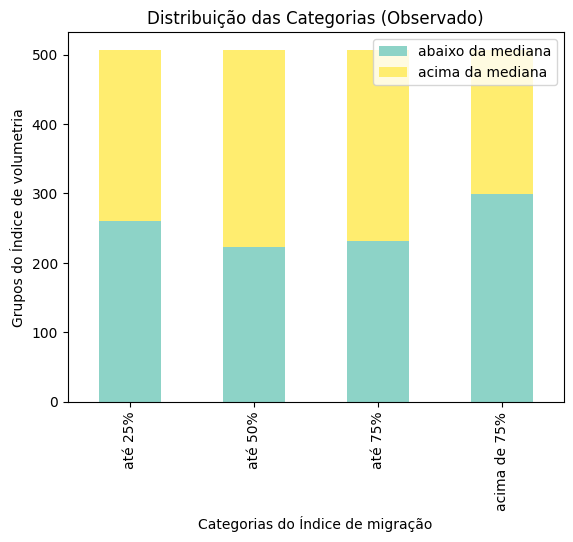

In [ ]:
#Tabela de contingência
transposed_table = contingency_table.T

# Grafico
plt.figure(figsize=(10, 6))
transposed_table.plot(kind='bar', stacked=True, cmap='Set3')
plt.title("Distribuição das Categorias (Observado)")
plt.xlabel("Categorias do Índice de migração")
plt.ylabel("Grupos do Índice de volumetria")
plt.legend(title="")
plt.show()

Este gráfico fornece uma representação visual intuitiva e clara das relações entre as variáveis que podemos observar acima na tabela de Contingência. Ele permite uma compreensão mais rápida e fácil das tendências e associações entre as categorias

---

## **5. Correlações entre os indicadores**

Nesta parte da análise, realizamos o cálculo das correlações entre os quatro indicadores e interpretamos os resultados.

### **Correlação de Pearson**

Segundo Cohen (1988) a correlação de Pearson varia de -1 a 1 (positivo ou negativo), isto é:

1) -0,3 a 0 ou 0 a 0,3: correlação desprezível;

2) -0,5 a -0,3 ou 0,3 a 0,5: correlação fraca;

3) -0,7 a -0,5 ou 0,5 a 0,7: correlação moderada;

4) -0,9 a -0,7 ou 0,7 a 0,9: correlação forte;

5) -1 a -0,9 ou 0,9 a 1: correlação muito forte.


O sinal indica direcção positiva ou negativa do relacionamento e o valor sugere a força da relação entre as variáveis.

### **Tabela das correlações**

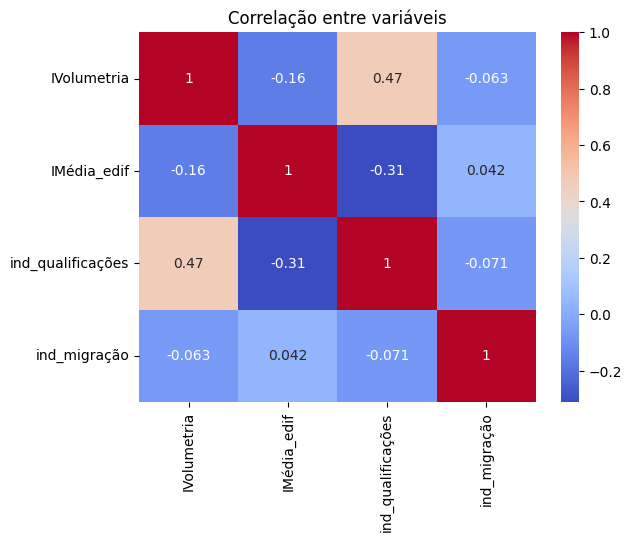

In [ ]:
#TABELA DAS MATRIZ DAS CORRELAÇÕES
subset = df_BGRI_s[['IVolumetria', 'IMédia_edif', 'ind_qualificações', 'ind_migração']]

correlation_matrix = subset.corr(method = 'spearman')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis')
plt.show()

---

De acordo com a Tabela da matriz das correlações (acima)dos 4 indicadores em estudo), concluimos o seguinte:

1. O Índice de volumetria e  o Índice da idade média do edificado têm uma correlação  igual a -0.016, por isso é uma correlação despresível. Como a correlação é negativa, significa que há uma relação inversa ou oposta entre estas duas variáveis. Isso significa que, à medida que uma variável aumenta, a outra tende a diminuir, e vice-versa.

2. O Índice de volumetria e  o Índice de qualificações têm uma correlação igual a 0.47, por isso é uma correlação fraca. Como esta correlação é positiva, significa que há uma relação directa entre o indice de volumetria e o índice d qualificações.  

3. O Índice de volumetria e  o Índice de migração têm uma correlação igual a 0.063, por isso é uma correlação despresível. Como esta correlação é positiva, significa que há uma relação directa entre estas duas variáveis.

4. O Índice da idade média e  o Índice de qualificações têm uma correlação igual a -0.31 , por isso é uma correlação fraca negativa. Como esta correlação é negativa, significa que há uma relação inversa ou oposta entre estas duas variáveis.

5. O Índice da idade média e  o Índice de migração têm uma correlação igual a -0.071 , por isso é uma correlação despresível. Como esta correlação é negativa, significa que há uma relação inversa ou oposta entre estas duas variáveis.


6. O Índice de qualificações e  o Índice de migração têm uma correlação igual a 0.02, por isso é uma correlação fraca.

---


###**Gráfico de Dispersão**

Geometricamente, um gráfico ou diagrama de dispersão é uma coleção de pontos
num plano cujas duas coordenadas cartesianas são os valores de cada membro do par de
dados. Os coeficientes apresentados auxiliam na quantificação do grau de
relação entre as variáveis em análise. Abaixo apresentamos os gráficos (diagramas) de dispersão entre as variáveis em estudo. Como são quatro indicadores, aplicando combinação de 4 tomada dois a dois vamos ter no total seis (6) agrupamentos.

 **a) Gráfico de Dispersão entre Índice de Volumétrico e índice de média de anos de idade de edificado**

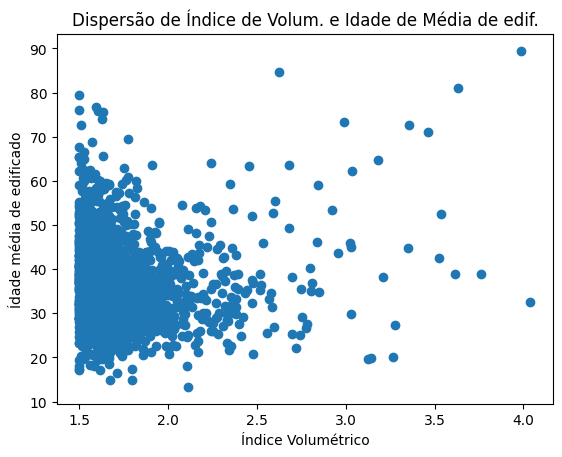

In [ ]:
IVolumetria = df_BGRI_s["IVolumetria"]
IMédia_edif = df_BGRI_s["IMédia_edif"]

plt.scatter(IVolumetria, IMédia_edif)
plt.xlabel('Índice Volumétrico')
plt.ylabel('Ídade média de edificado')
plt.title('Dispersão de Índice de Volum. e Idade de Média de edif.')
plt.show()

Verificamos no gráfico acima que os dados entre o
Índice Volumétrico e Idade média do edificado mostram que não há tendência de seguir uma linha recta. Por a correlação é nula ou despresível.

**b) Gráfico de Dispersão entre índice volumétrico e indice de qualificações**


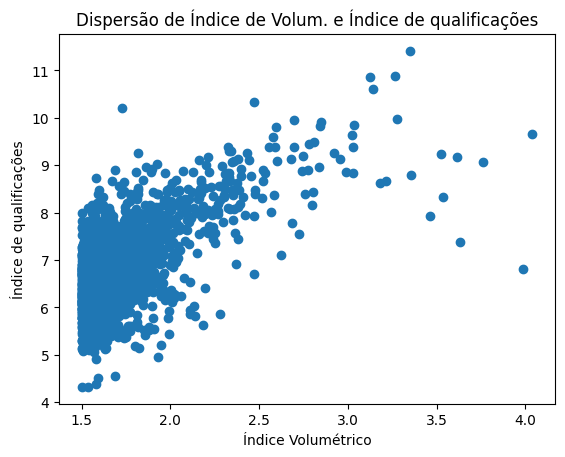

In [ ]:
IVolumetria = df_BGRI_s["IVolumetria"]
ind_qualificações = df_BGRI_s["ind_qualificações"]

plt.scatter(IVolumetria,ind_qualificações)
plt.xlabel('Índice Volumétrico')
plt.ylabel('Índice de qualificações')
plt.title('Dispersão de Índice de Volum. e Índice de qualificações')
plt.show()


O gráfico acima mostra que os dados do
Índice Volumétrico e Idade média do edificado têm tendência de seguir uma linha recta. Aplicando o critério apresentado por Cohen (1988), implica que a correlação é moderada.

**c) Gráfico de Dispersão entre índice volumétrico e indice de migração**

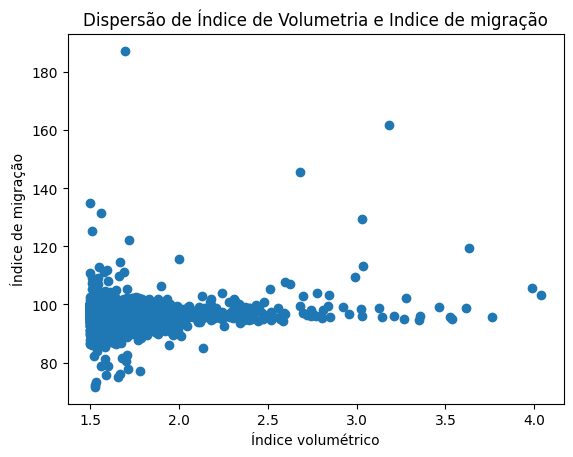

In [ ]:
IVolumetria = df_BGRI_s["IVolumetria"]
ind_migração = df_BGRI_s["ind_migração"]

plt.scatter(IVolumetria,ind_migração)
plt.xlabel('Índice volumétrico')
plt.ylabel('Índice de migração')
plt.title('Dispersão de Índice de Volumetria e Indice de migração')
plt.show()

O diagrama acima apresenta uma correlação negativa, despresível ou nula entre o índice de volumetria e o Índice de migração.  O gráfico mostra que a correlação é positiva e isto significa que há uma relação directa entre estas duas variáveis.


**d) Gráfico de Dispersão entre Índice Médio de anos de edificado e Índice de qualificações**

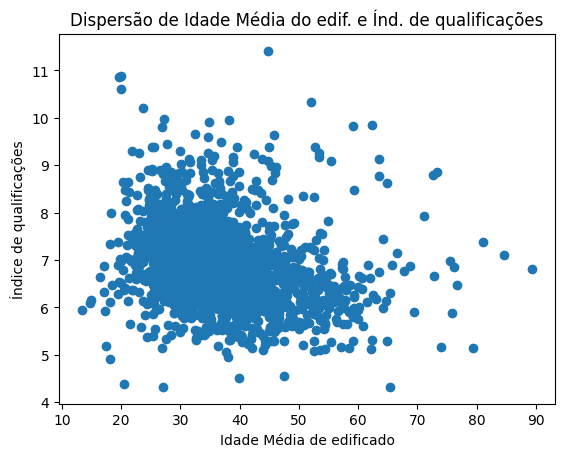

In [ ]:
IMédia_edif = df_BGRI_s["IMédia_edif"]
ind_qualificações = df_BGRI_s["ind_qualificações"]

plt.scatter(IMédia_edif,ind_qualificações)
plt.xlabel('Idade Média de edificado')
plt.ylabel('Índice de qualificações')
plt.title('Dispersão de Idade Média do edif. e Índ. de qualificações')
plt.show()

Verificamos no diagrama acima que a correlação entre o índice da idade média e  o índice de qualificações é negativa e despresivel ou nula, porque não têm tendência de seguir uma linha recta. Como esta correlação é negativa, significa que há uma relação inversa ou oposta entre estas duas variáveis.


**e) Gráfico de Dispersão entre Índice Médio de anos de edificado e Índice de migração**

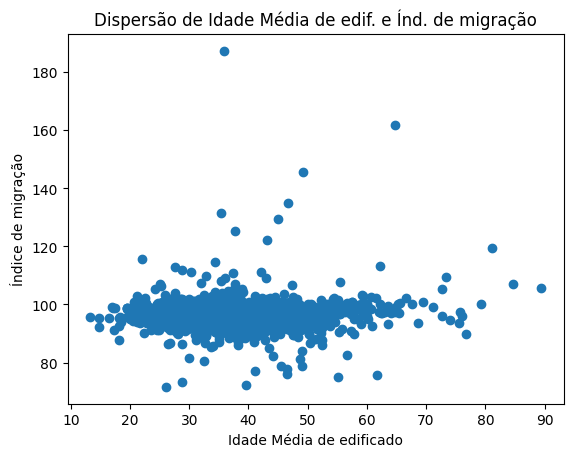

In [ ]:
IMédia_edif = df_BGRI_s["IMédia_edif"]
ind_migração = df_BGRI_s["ind_migração"]

plt.scatter(IMédia_edif,ind_migração)
plt.xlabel('Idade Média de edificado')
plt.ylabel('Índice de migração')
plt.title('Dispersão de Idade Média de edif. e Índ. de migração')
plt.show()

O gráfico acima apresenta uma correlação negativa entre o Índice da idade média e  o Índice de migração. Como esta correlação é negativa, significa que há uma relação inversa ou oposta entre estas duas variáveis.



**f) Gráfico de Dispersão entre Índice de qualificações e Índice de migração**

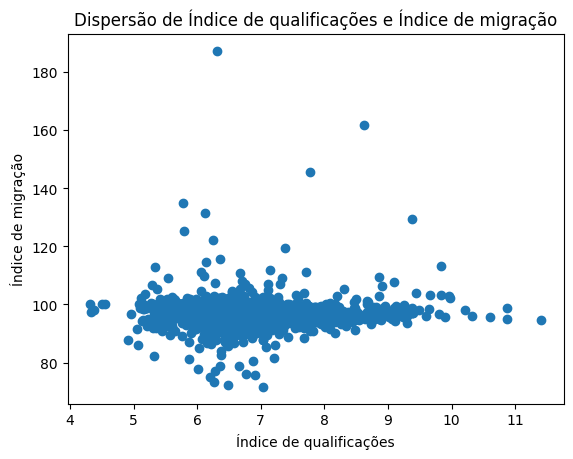

In [ ]:
ind_qualificações = df_BGRI_s["ind_qualificações"]
ind_migração = df_BGRI_s["ind_migração"]

plt.scatter(ind_qualificações,ind_migração)
plt.xlabel('Índice de qualificações')
plt.ylabel('Índice de migração')
plt.title('Dispersão de Índice de qualificações e Índice de migração')
plt.show()

O diagrama acima apresenta uma correlação positiva fraca entre o Índice de qualificações e o Índice de migração. Isto quer dizer que ambos indicadores são directamente proporcionais.

# **REFERÊNCIAS BIBLIOGRÁFICAS**


Cohen, J. (1988), Statistical power analysis for the behavioral
sciences. *Texto em itálico*  Hillsdale, NJ, Erlbaum.


Miranda, M.M.S (1998). Introdução à Estatística, Aveiro: Universidade.